In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("heart.csv")
df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

<Figure size 600x600 with 0 Axes>

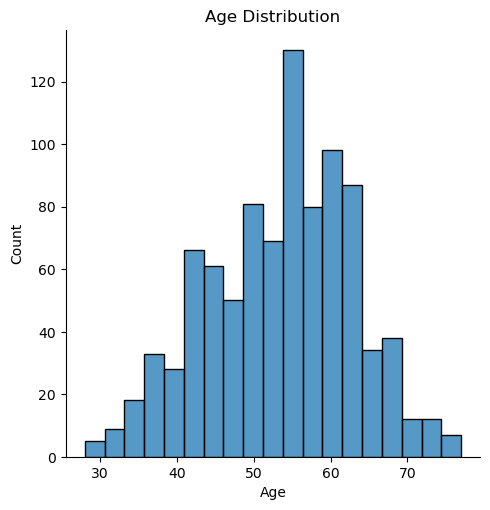

In [3]:
plt.figure(figsize =(6,6))
sns.displot(x = df["Age"])
plt.title("Age Distribution")
plt.show()

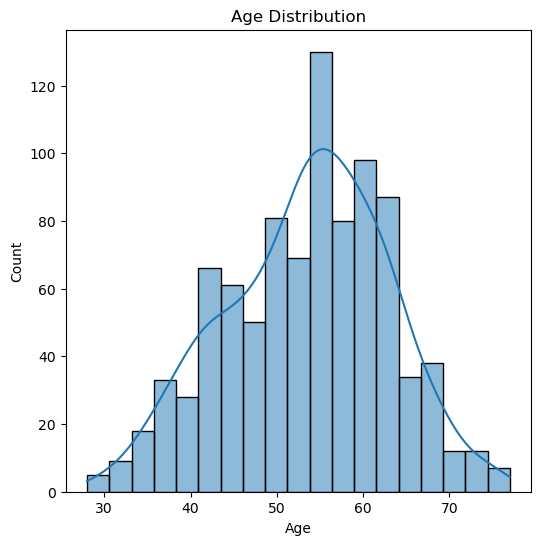

In [4]:
plt.figure(figsize =(6,6))
sns.histplot(x = df["Age"], kde = True)
plt.title("Age Distribution")
plt.show()

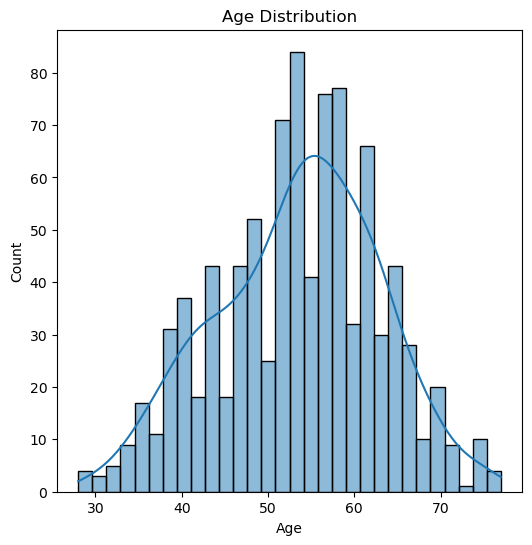

In [5]:
plt.figure(figsize =(6,6))
sns.histplot(x = df["Age"], kde = True, bins = 30)
plt.title("Age Distribution")
plt.show()

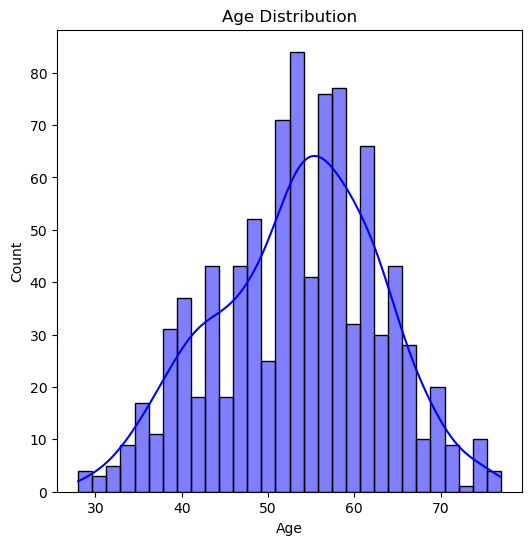

In [6]:
plt.figure(figsize =(6,6))
sns.histplot(x = df["Age"], kde = True, bins = 30, color = "blue")
plt.title("Age Distribution")
plt.show()

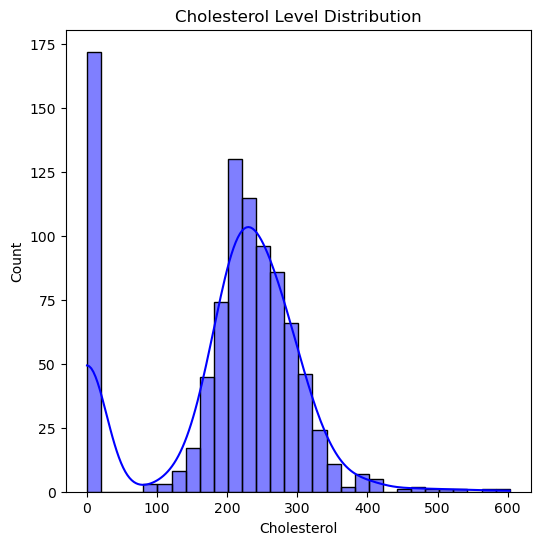

In [7]:
plt.figure(figsize =(6,6))
sns.histplot(x = df["Cholesterol"], kde = True, bins = 30, color = "blue")
plt.title("Cholesterol Level Distribution")
plt.show()

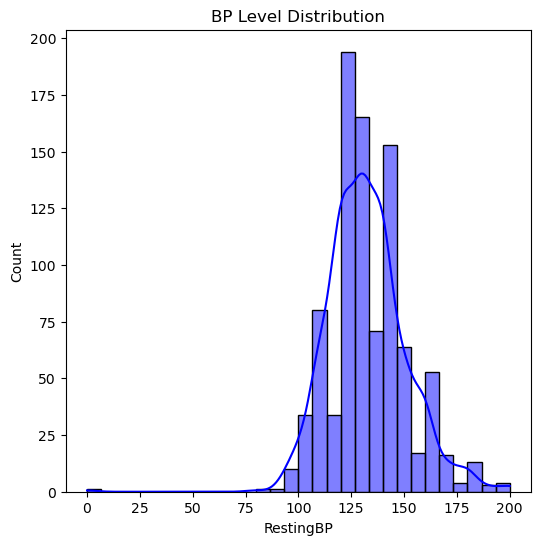

In [8]:
plt.figure(figsize =(6,6))
sns.histplot(x = df["RestingBP"], kde = True, bins = 30, color = "blue")
plt.title("BP Level Distribution")
plt.show()

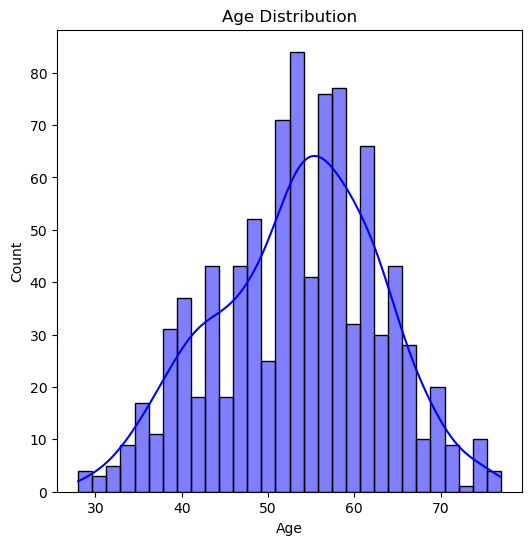

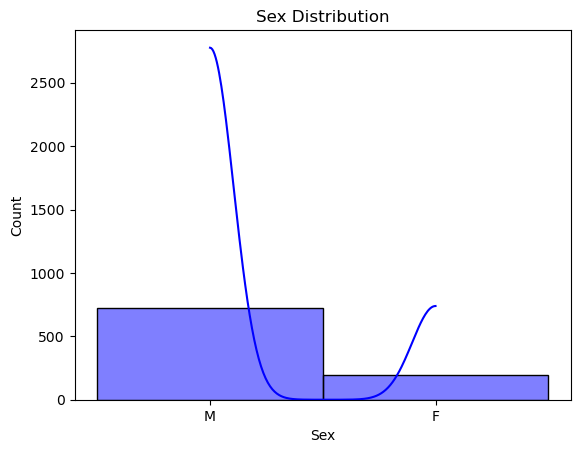

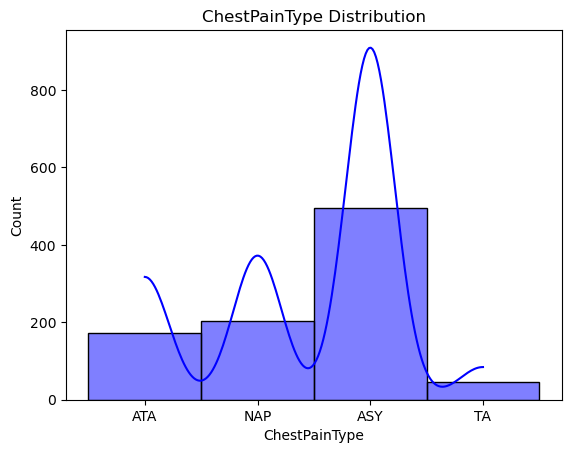

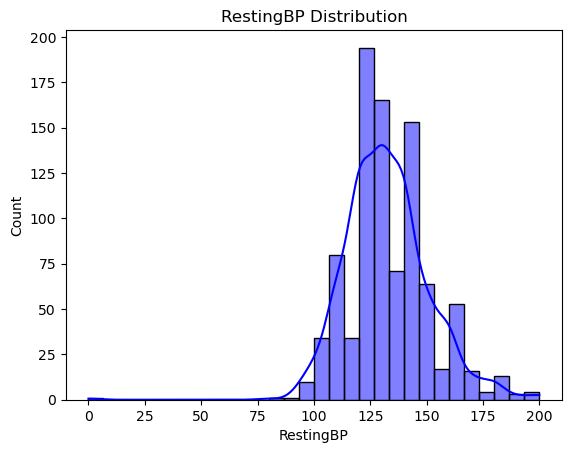

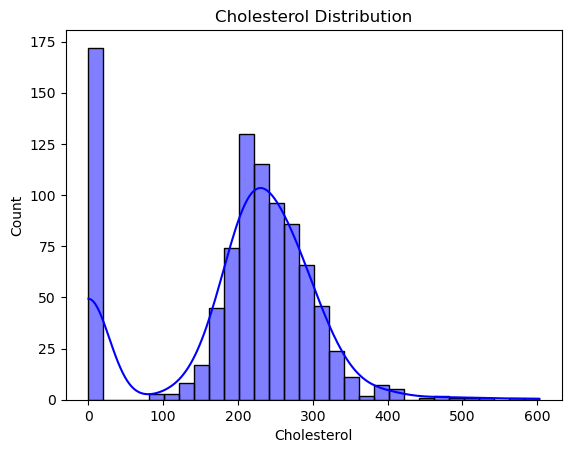

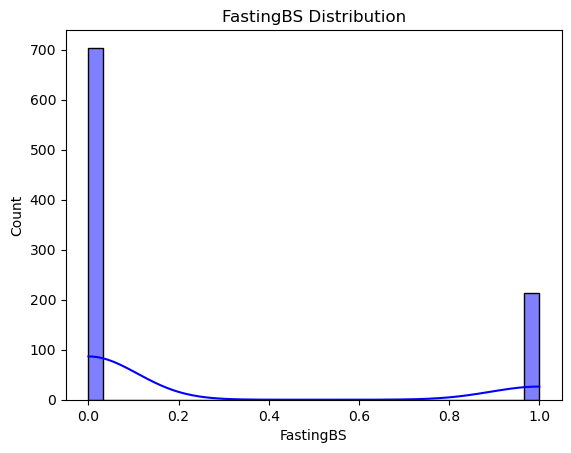

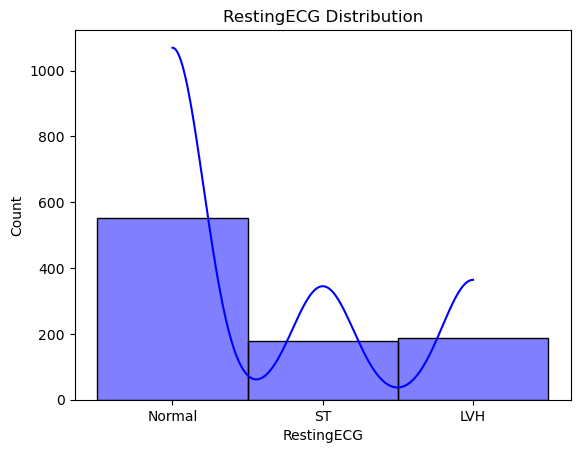

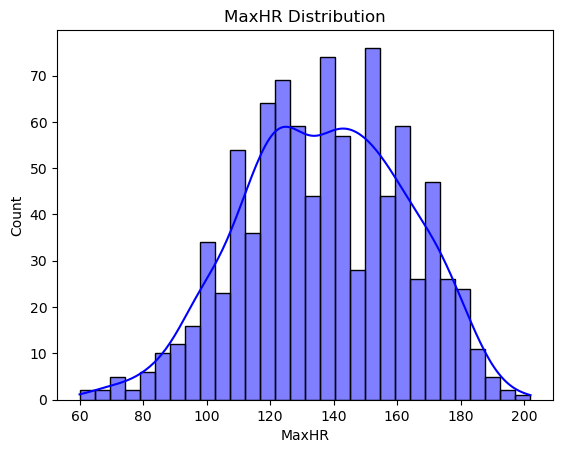

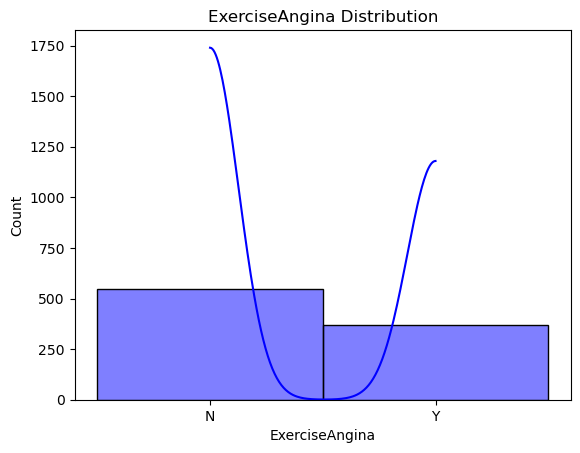

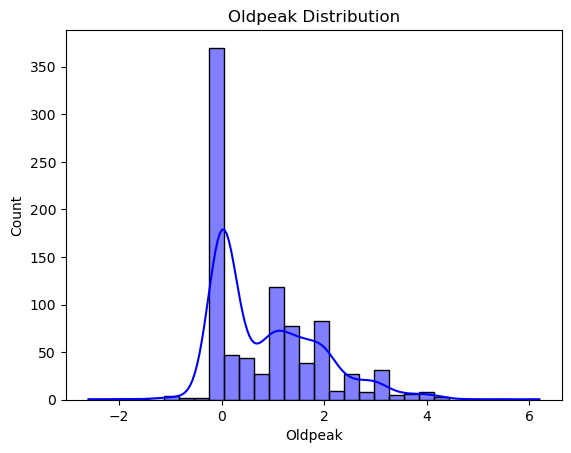

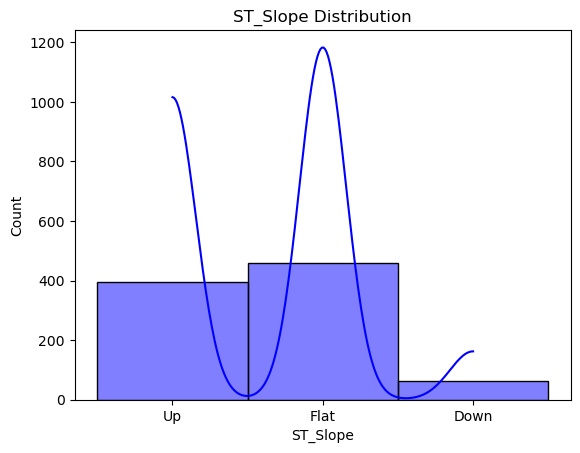

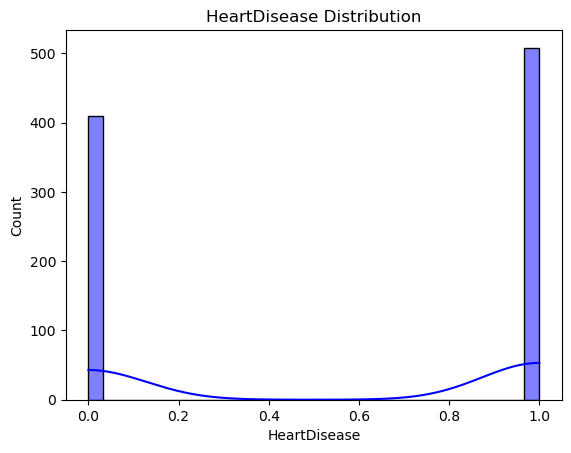

In [9]:
plt.figure(figsize =(6,6))
for col in df.columns:
    sns.histplot(x = df[col], kde = True, bins = 30, color = "blue")
    plt.title(f"{col} Distribution")
    plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Bar Plot and Piechart on all columns

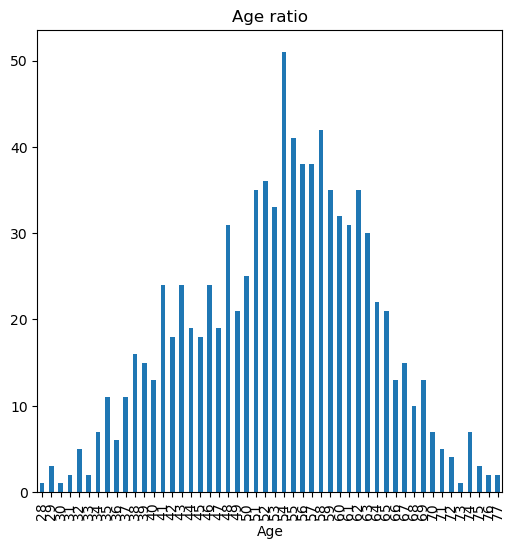

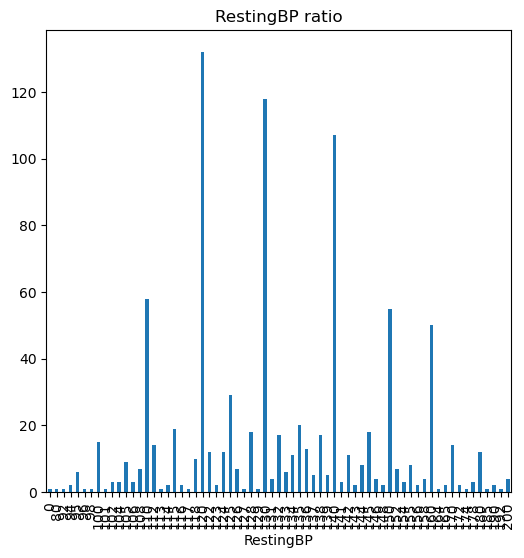

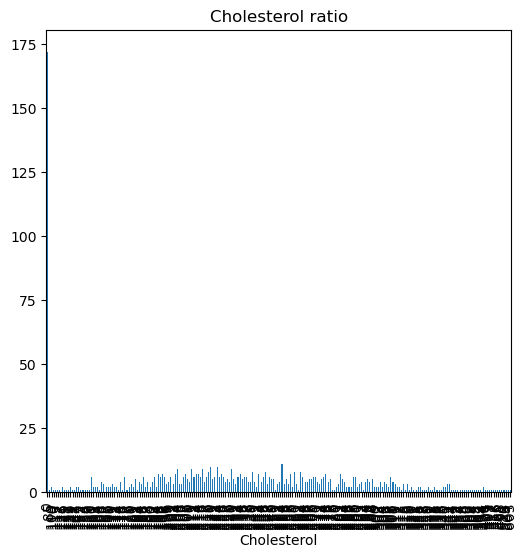

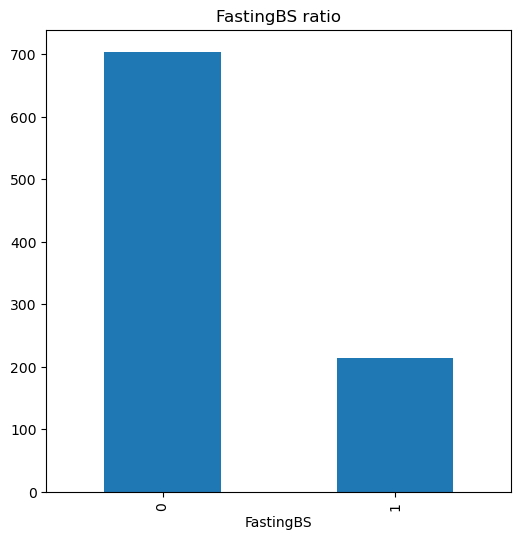

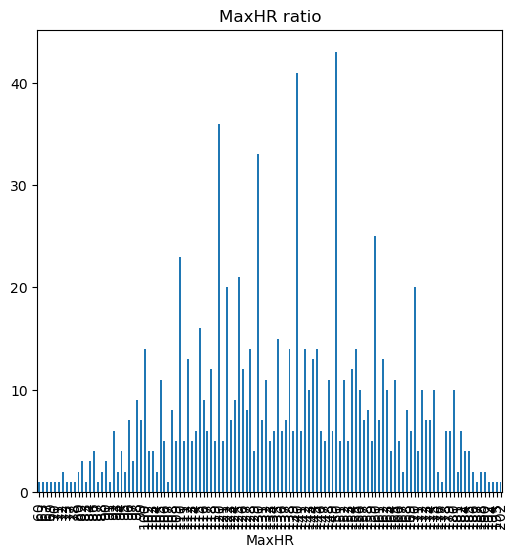

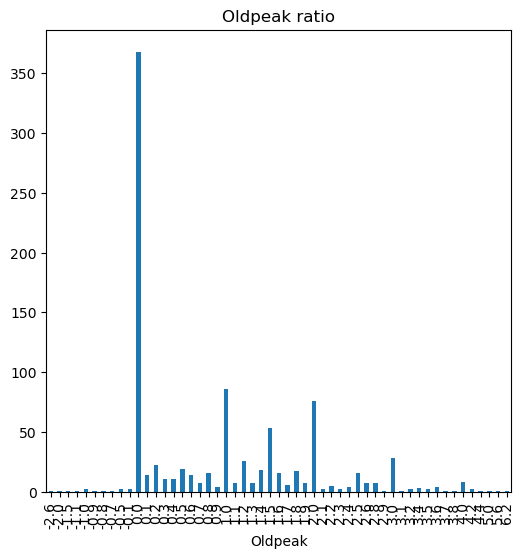

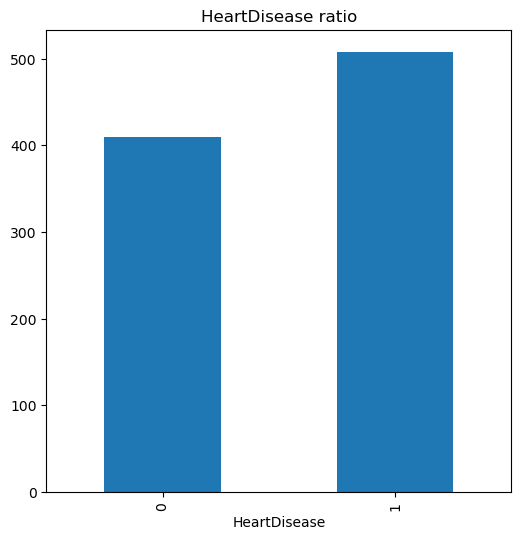

In [11]:
for col in df.columns:
    if df[col].dtype == "int64" or df[col].dtype == "float64":
        df.groupby(col).size().plot(kind = "bar",
                                   title = f"{col} ratio",
                                   figsize = (6,6))
        plt.show()

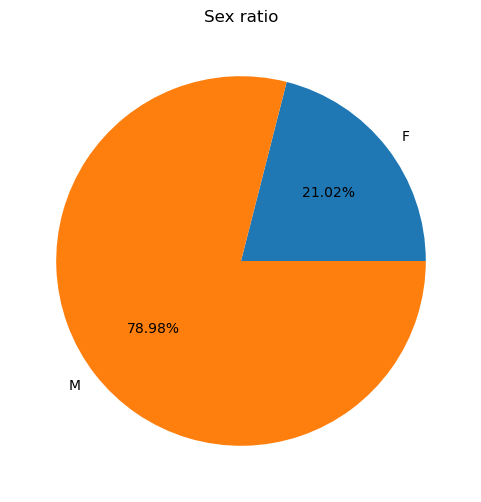

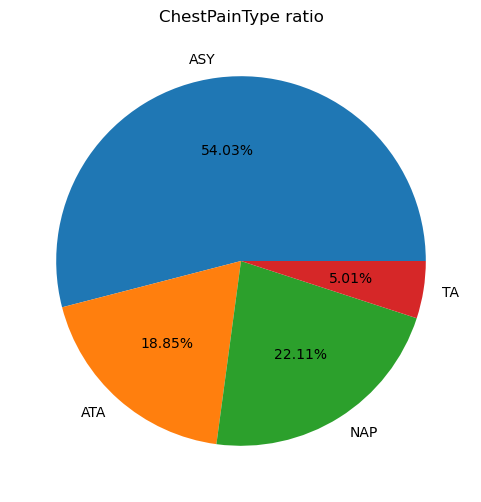

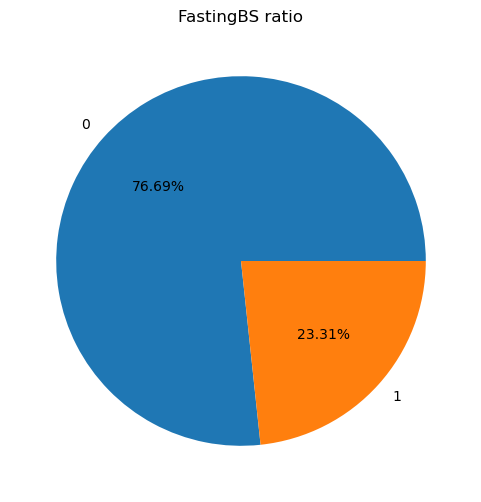

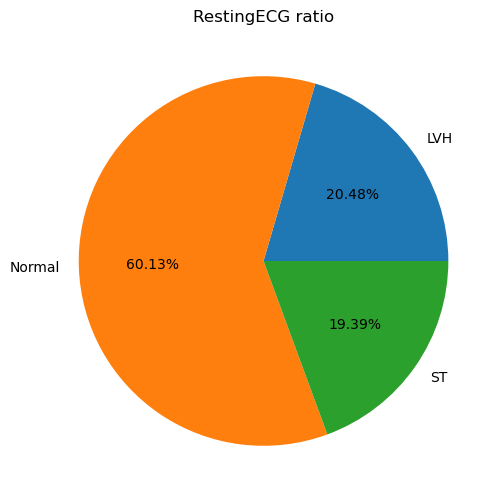

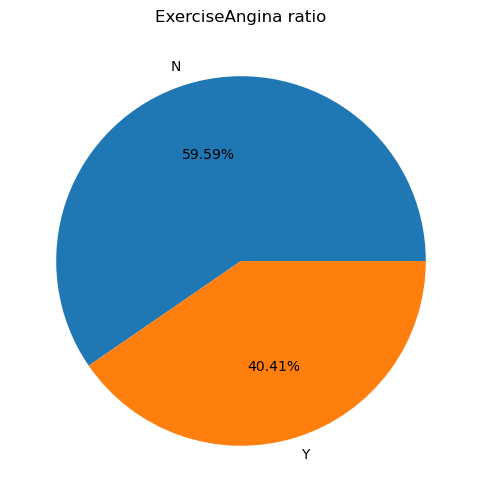

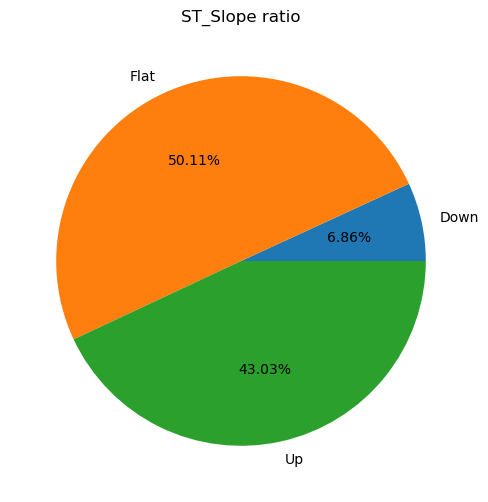

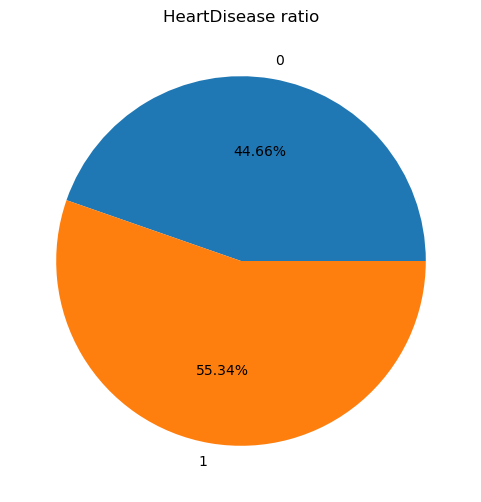

In [12]:
for col in df.columns:
    if df[col].nunique() < 10:
        df.groupby(col).size().plot(kind = "pie",
                                    autopct = "%.2f%%",
                                   title = f"{col} ratio",
                                   figsize = (6,6))
        plt.show()

### Violin Plot

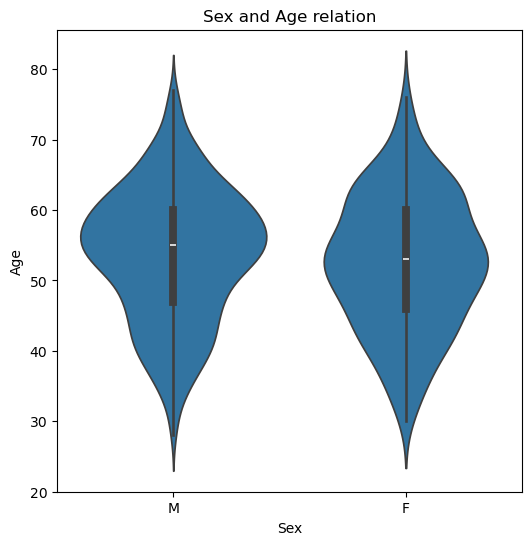

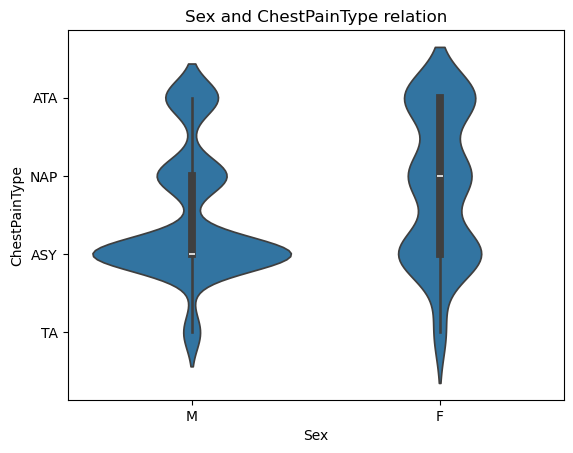

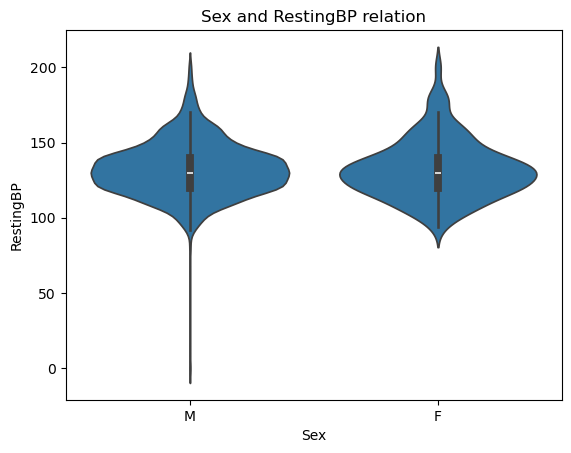

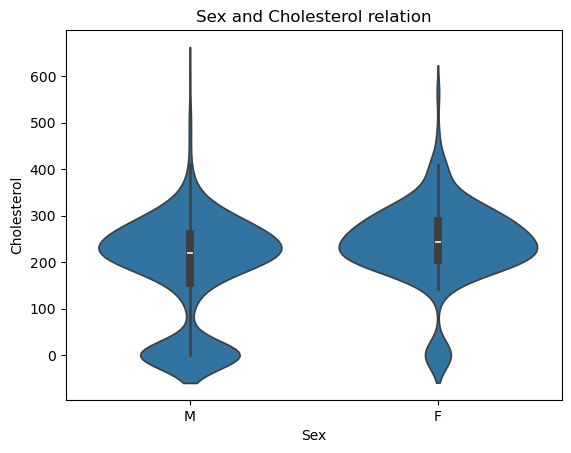

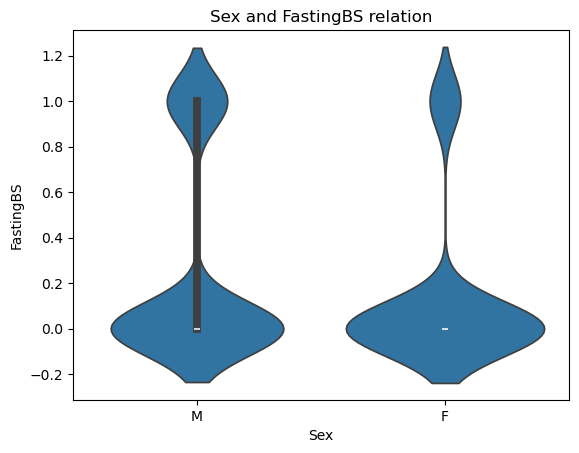

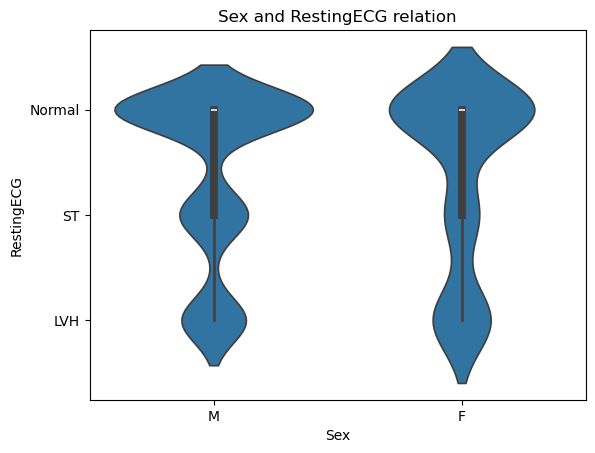

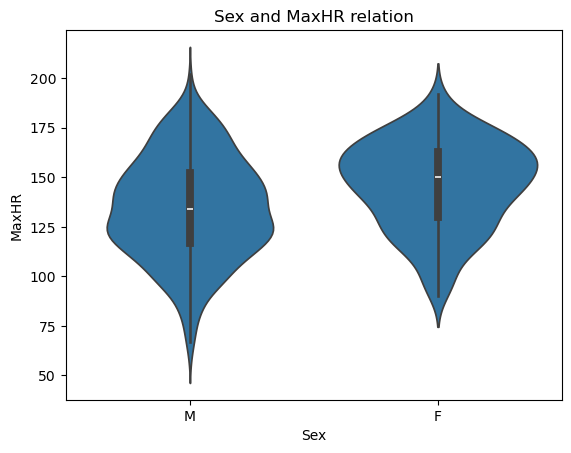

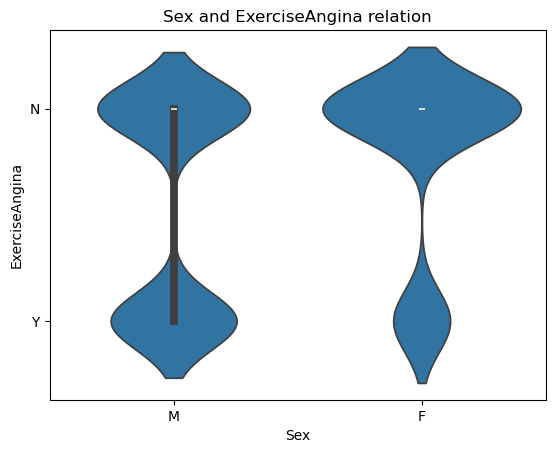

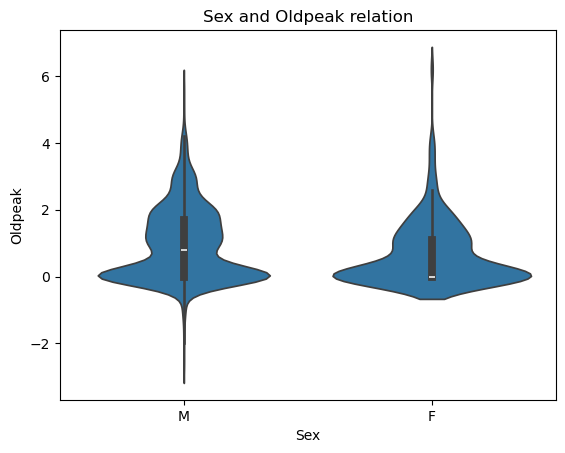

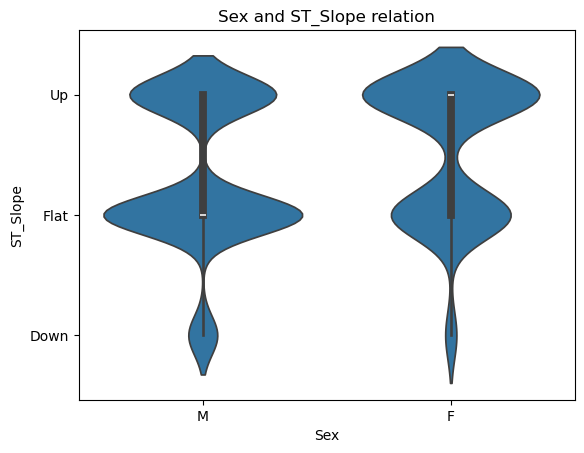

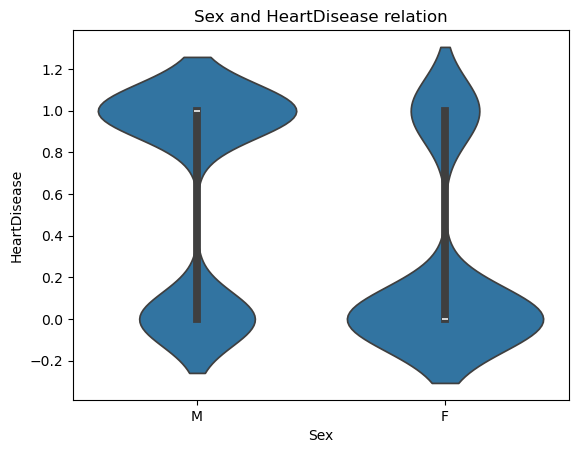

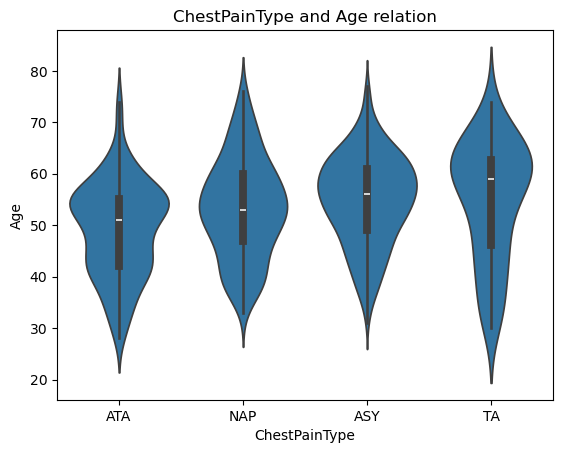

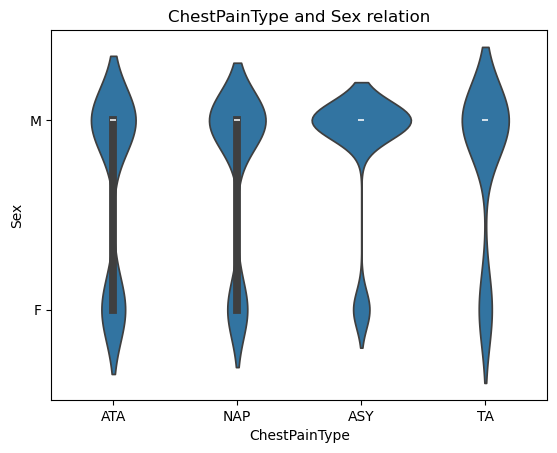

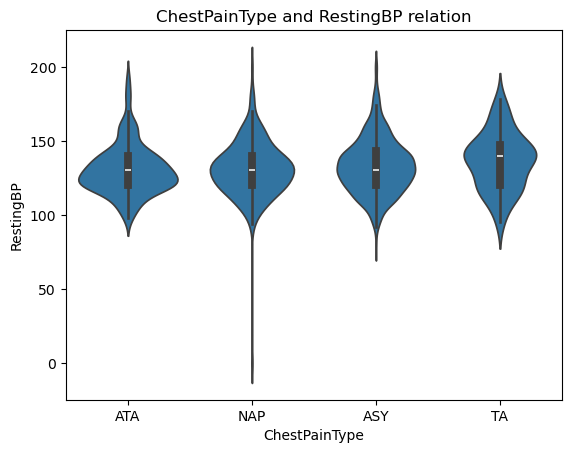

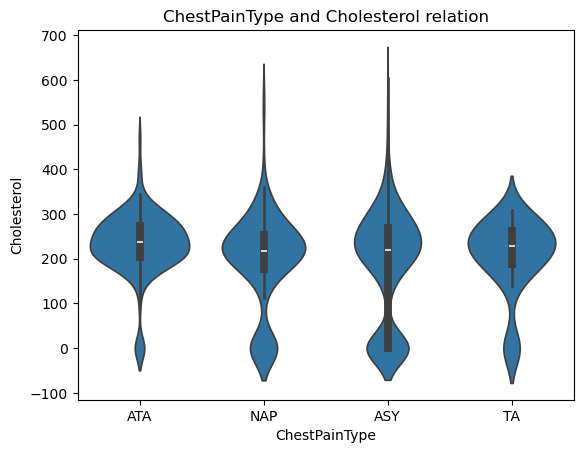

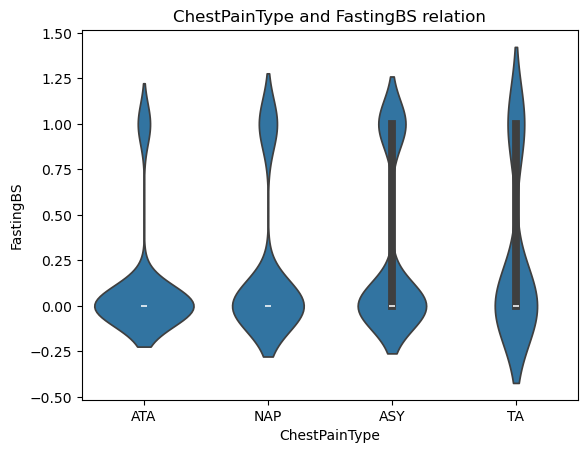

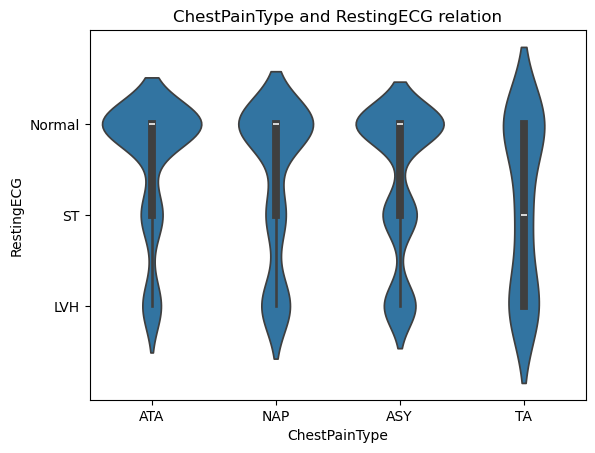

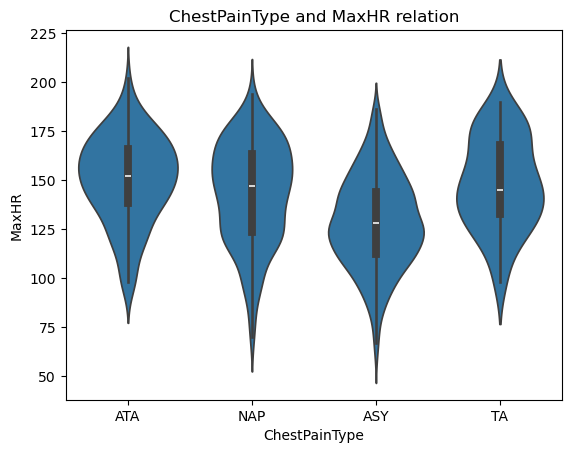

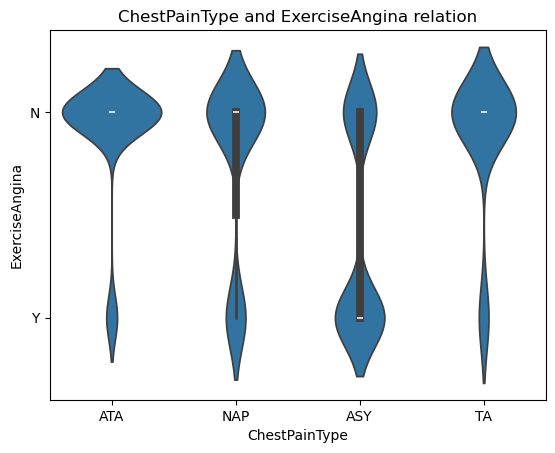

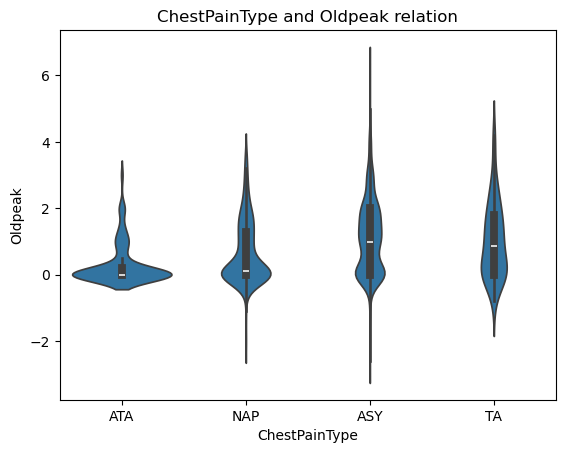

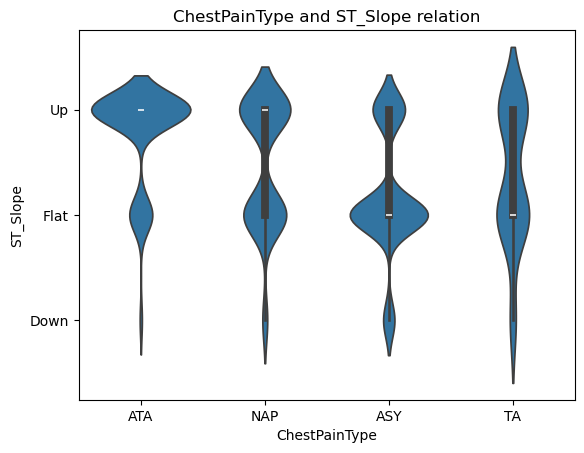

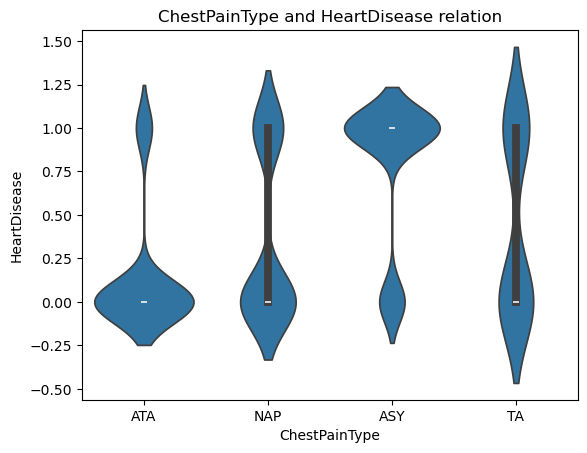

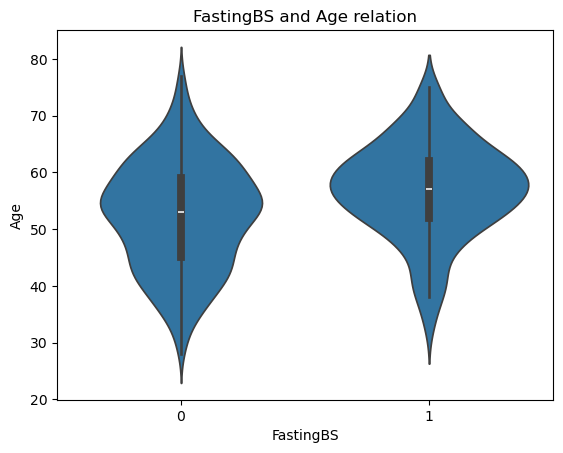

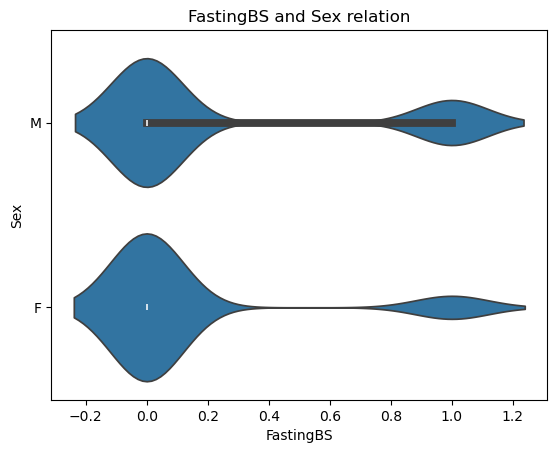

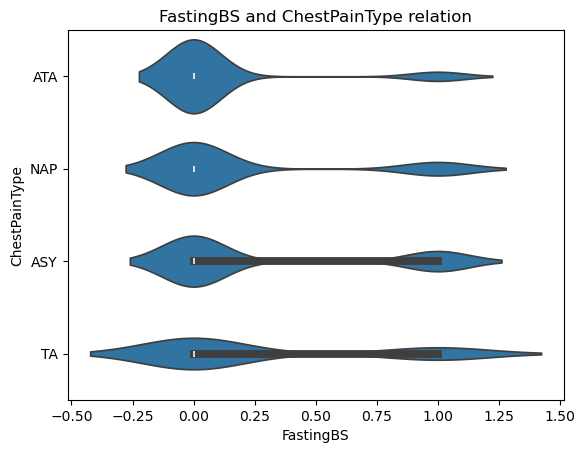

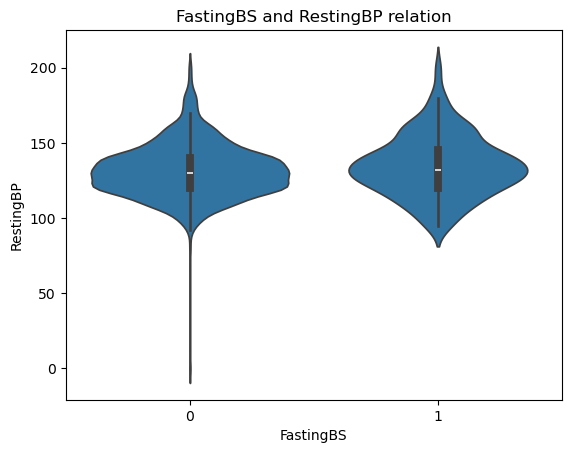

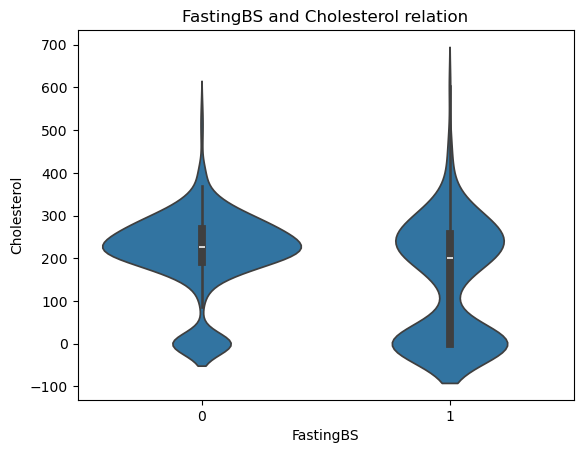

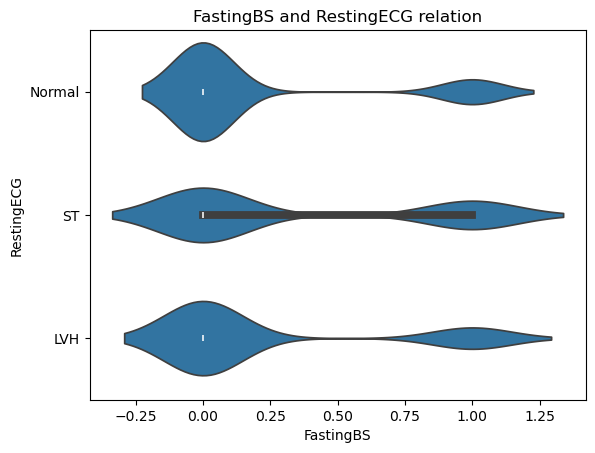

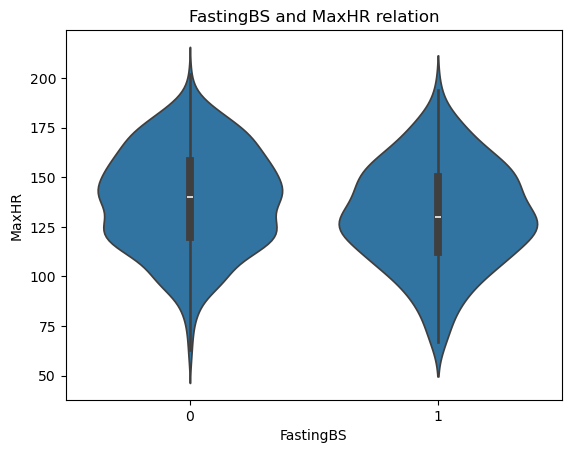

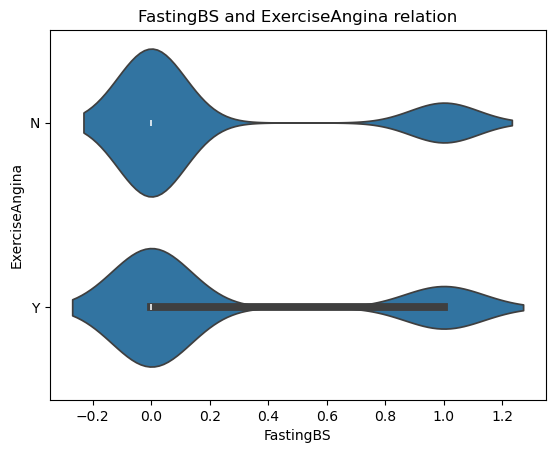

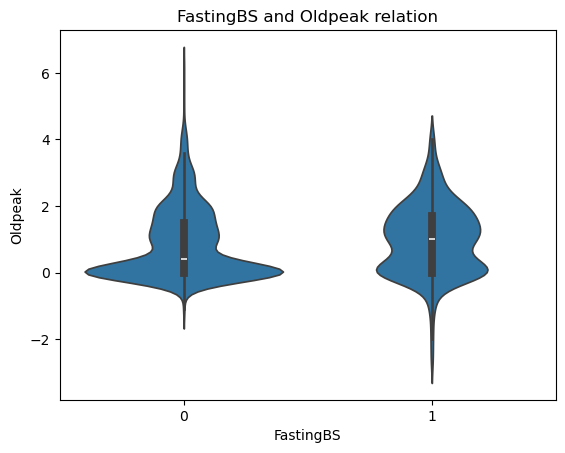

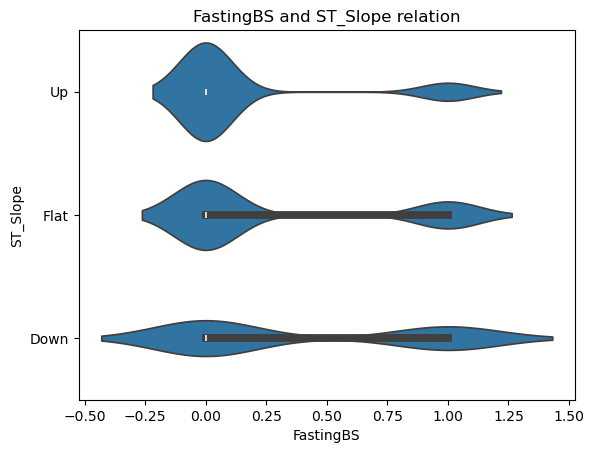

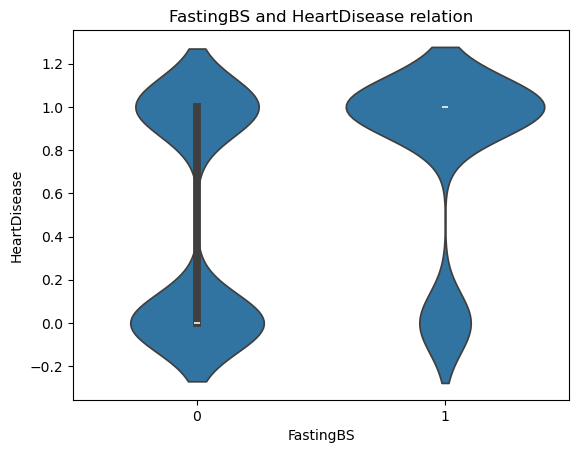

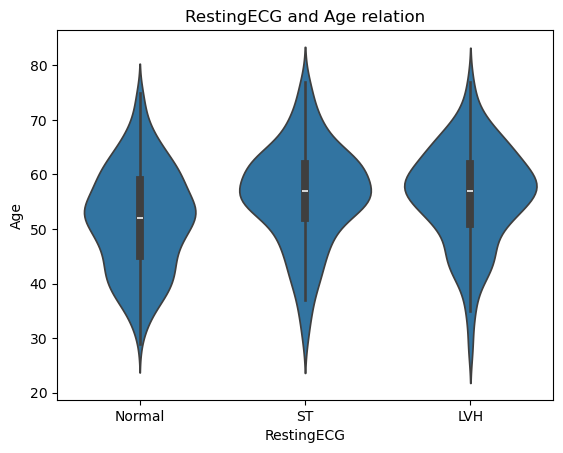

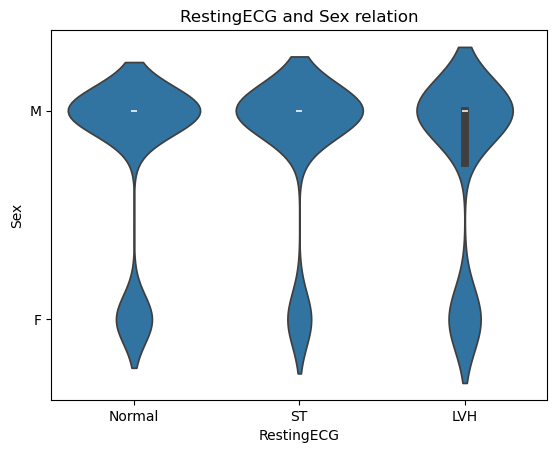

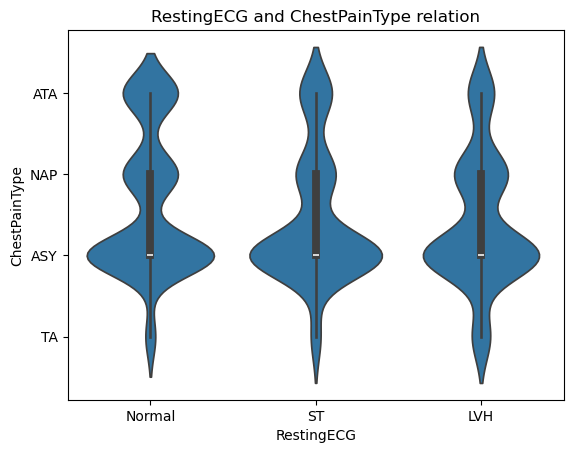

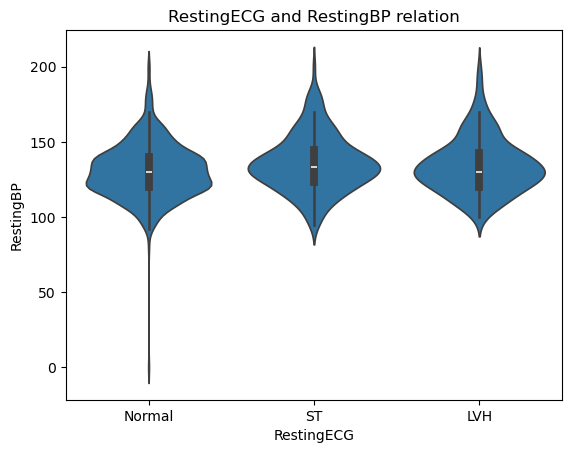

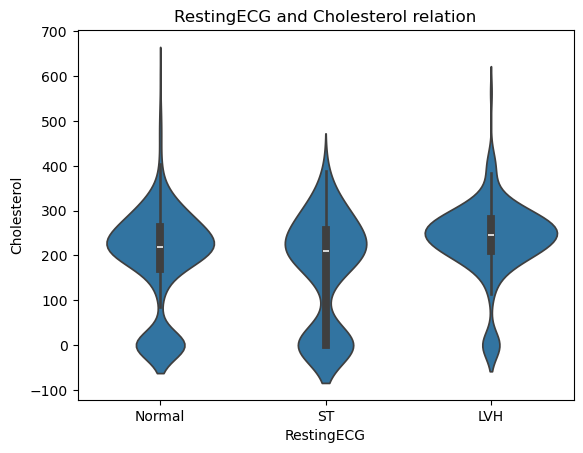

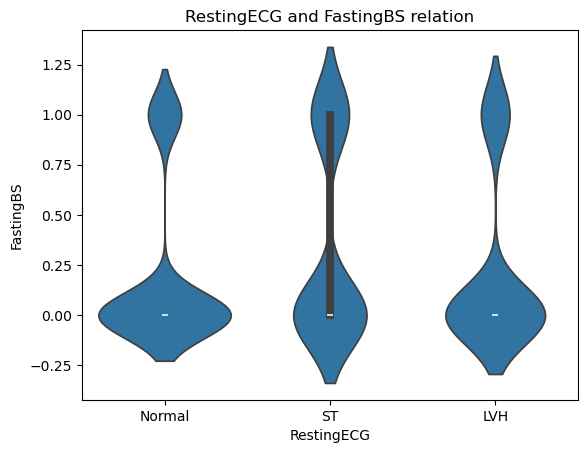

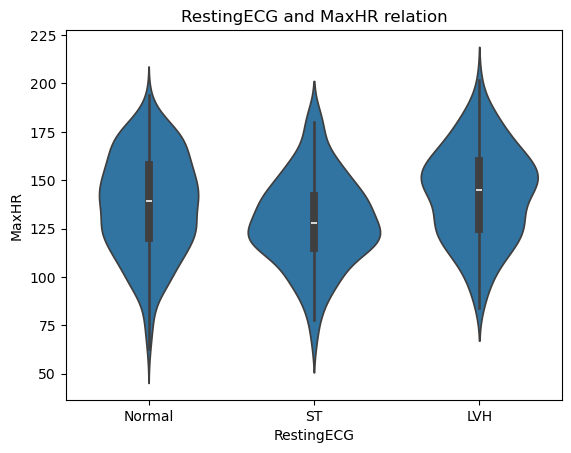

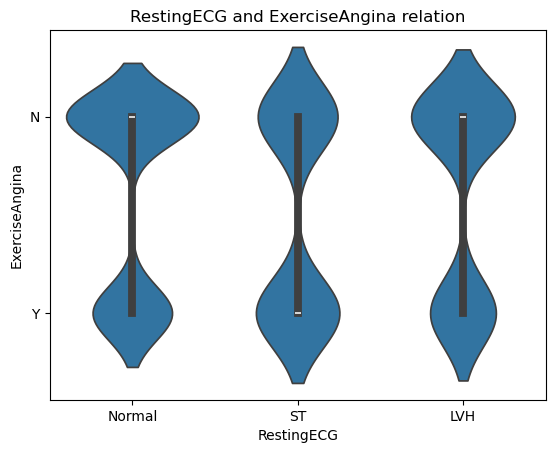

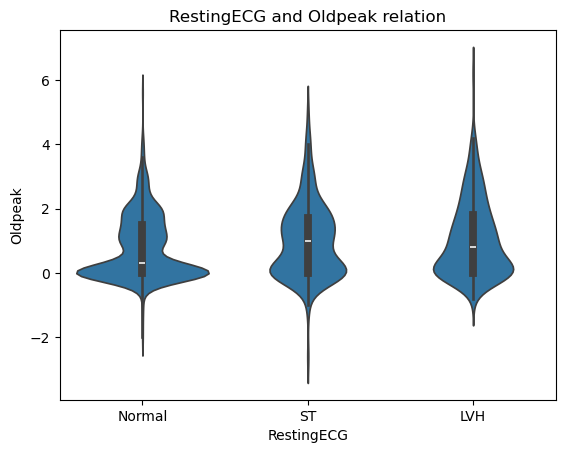

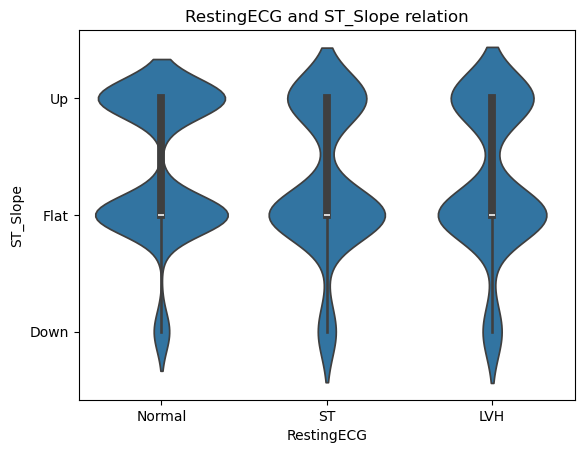

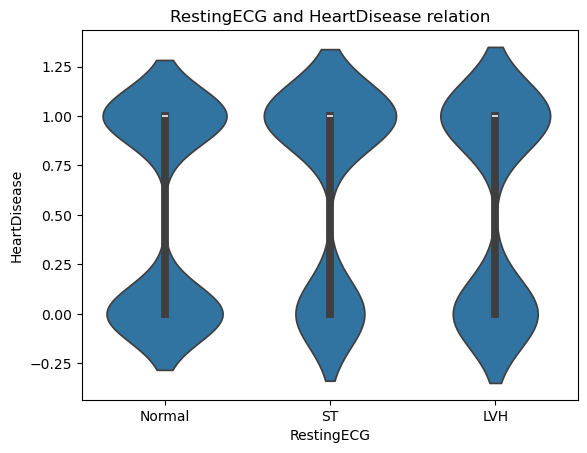

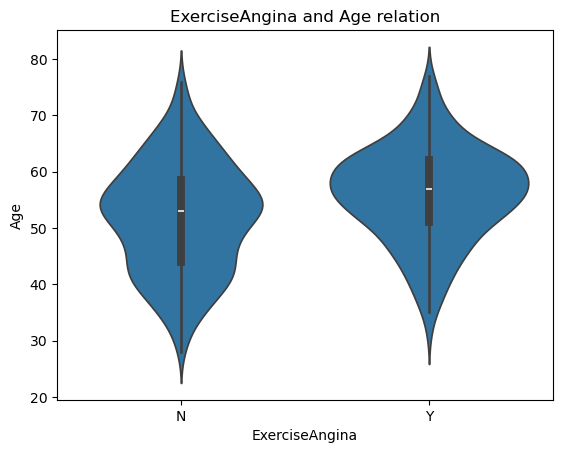

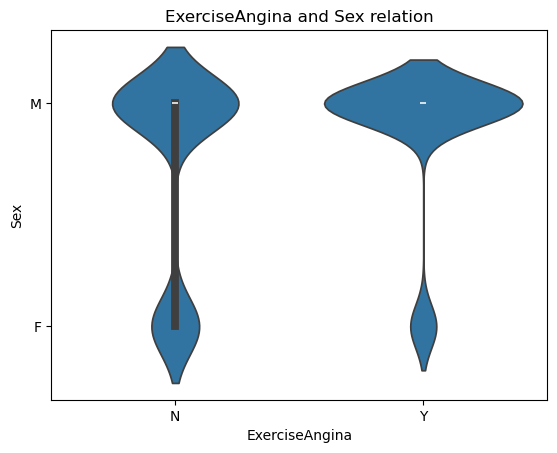

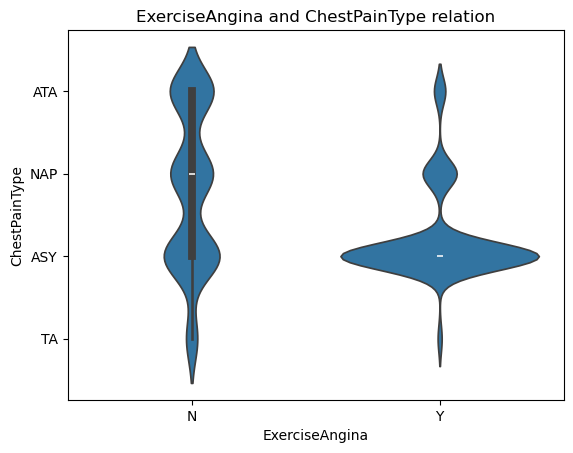

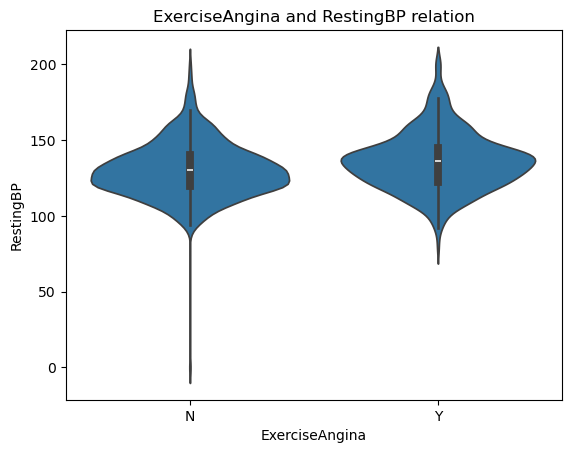

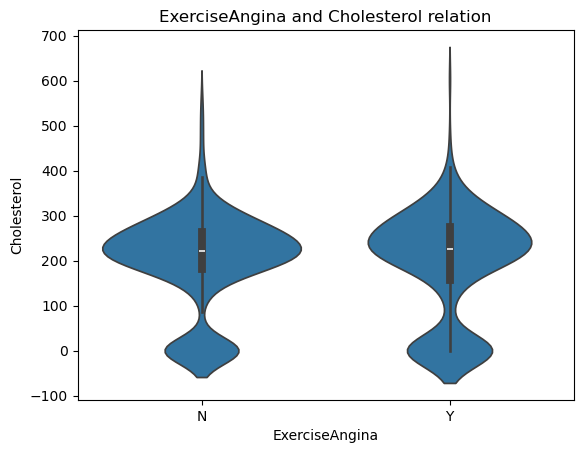

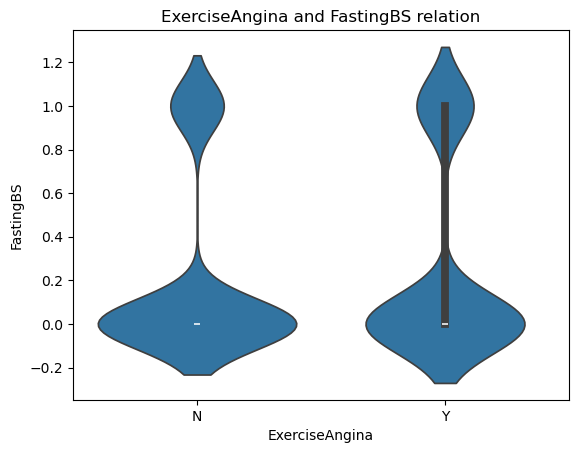

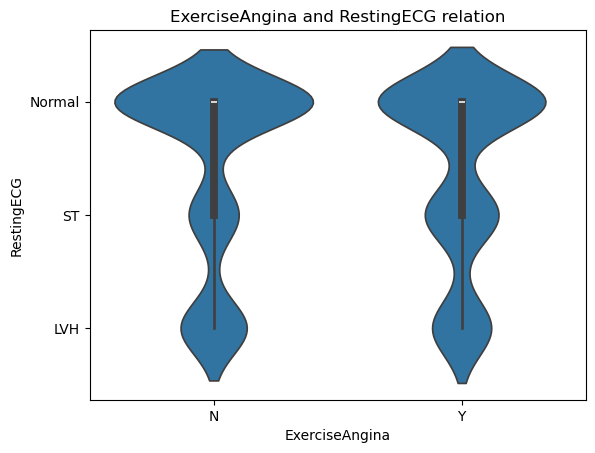

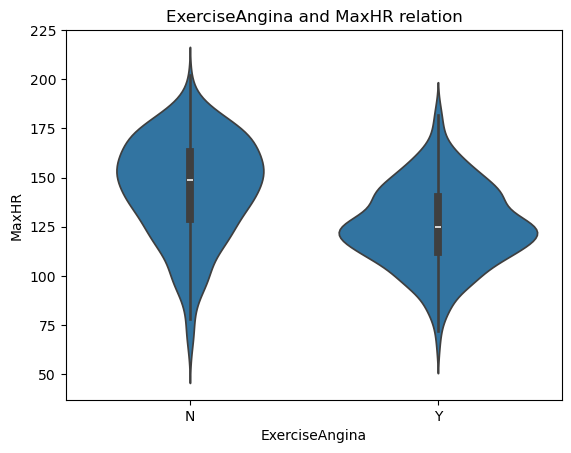

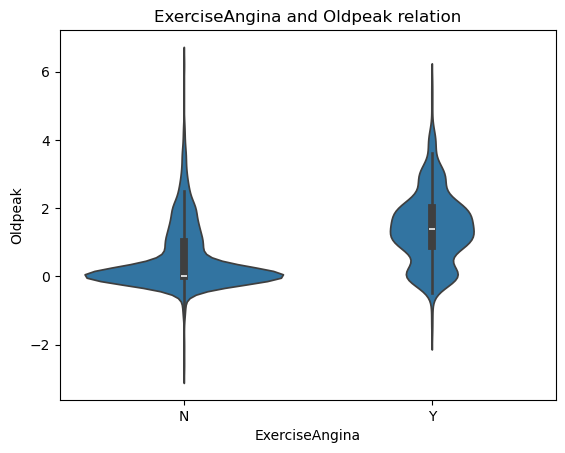

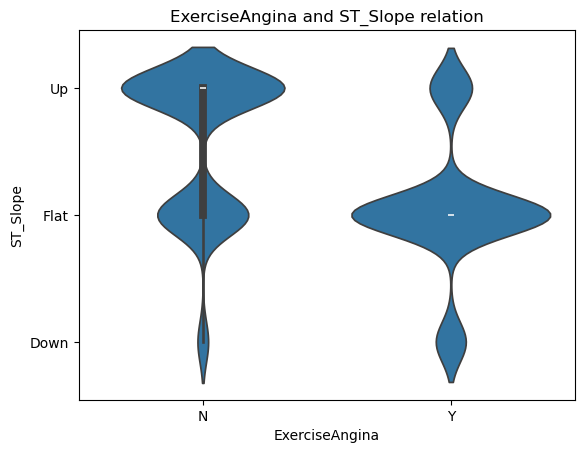

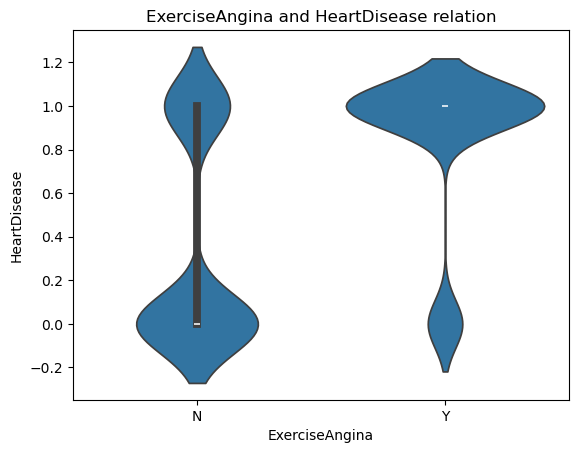

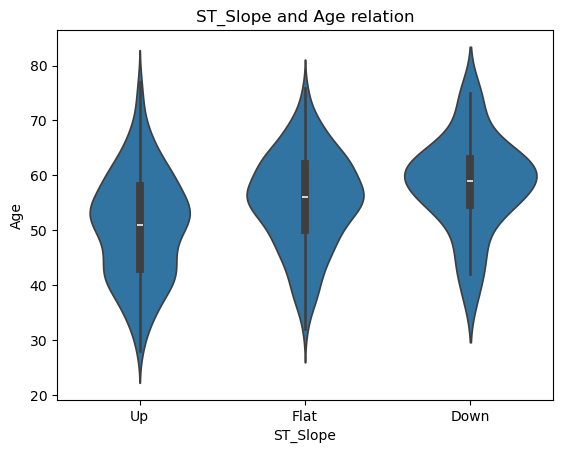

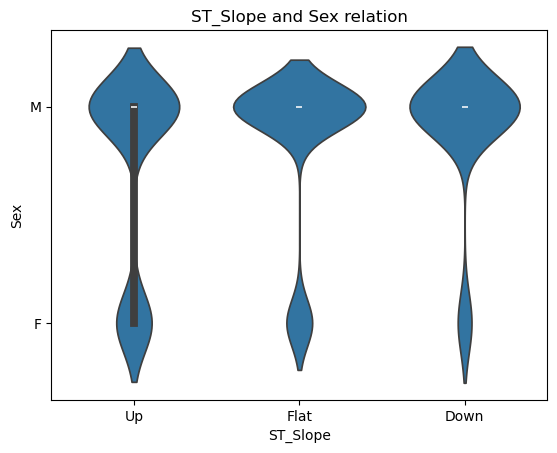

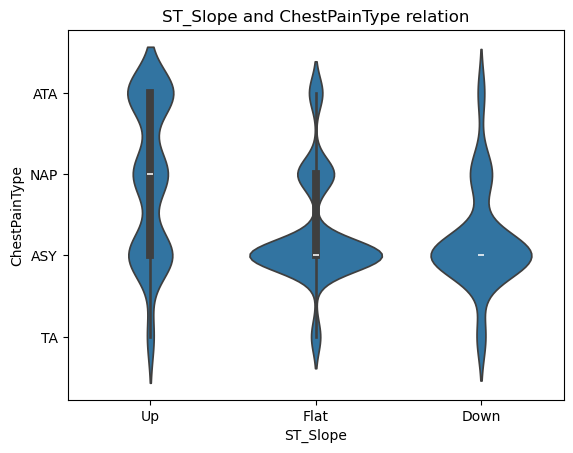

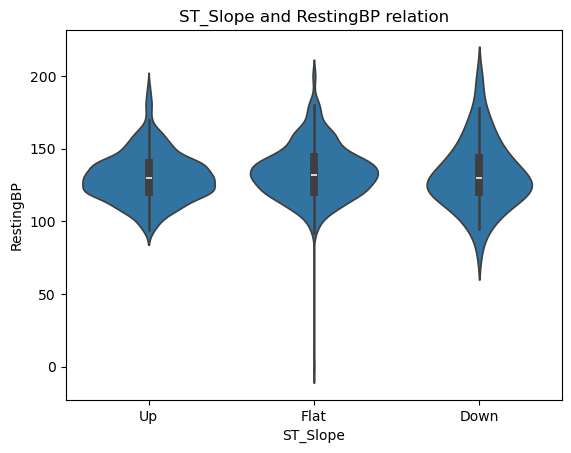

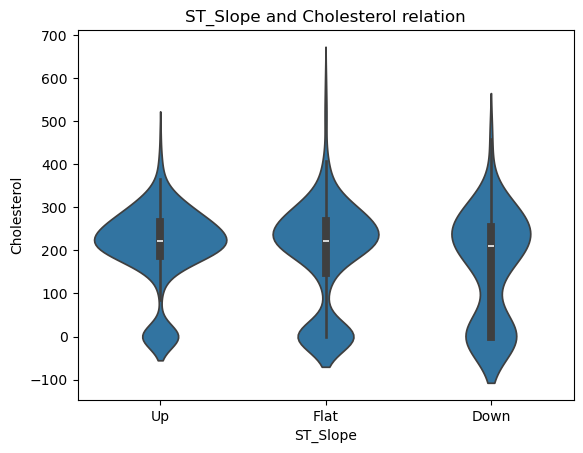

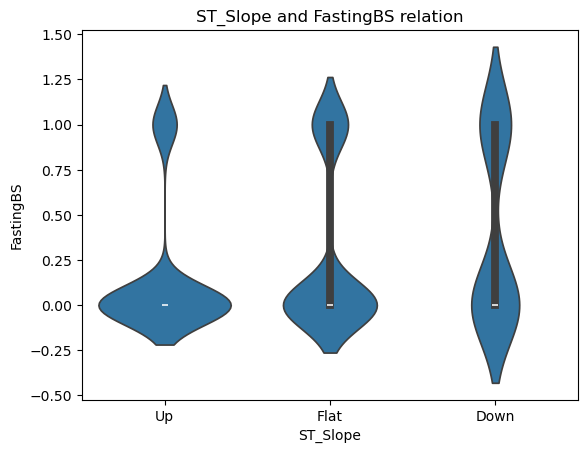

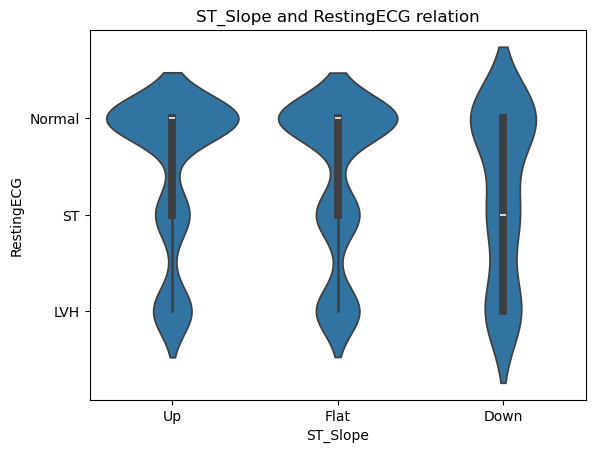

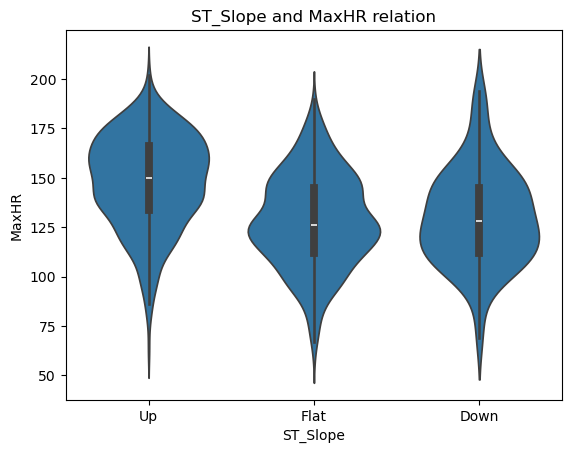

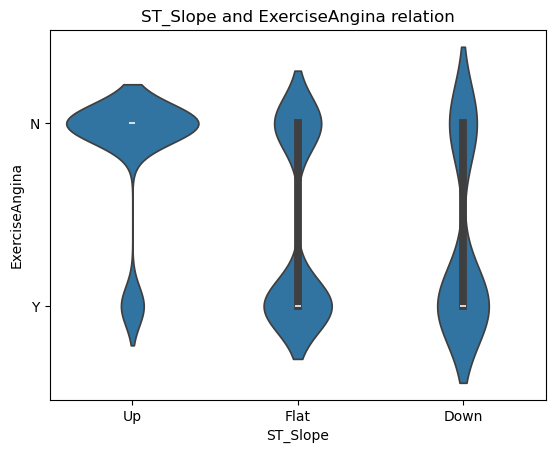

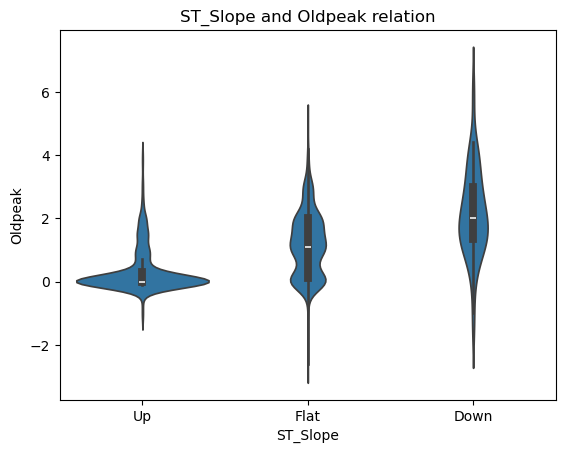

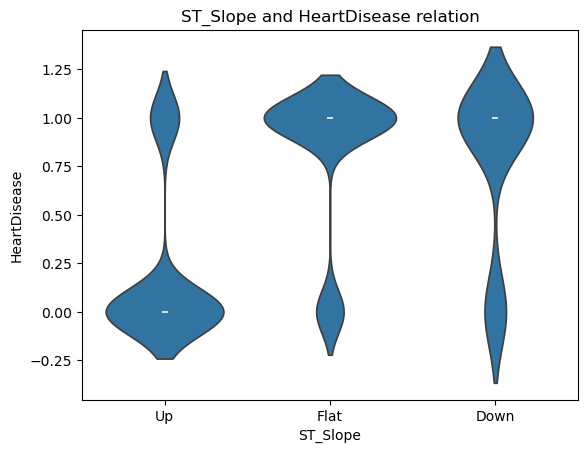

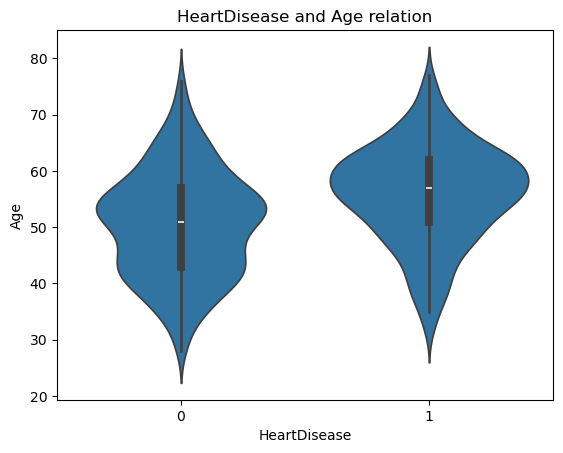

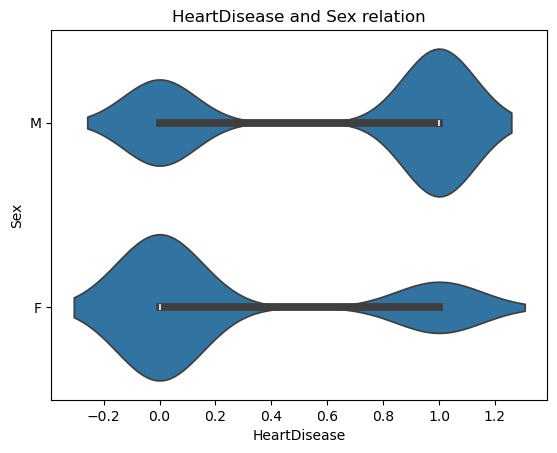

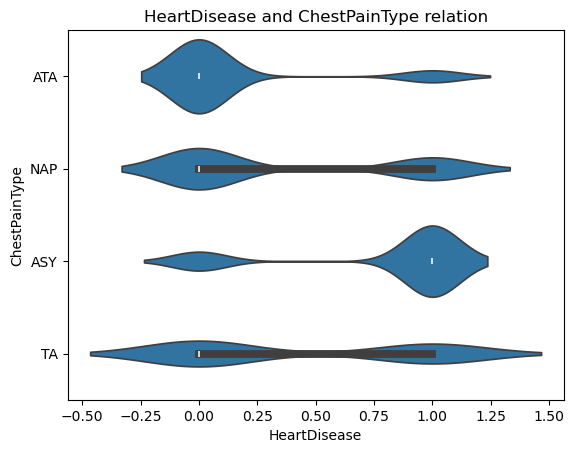

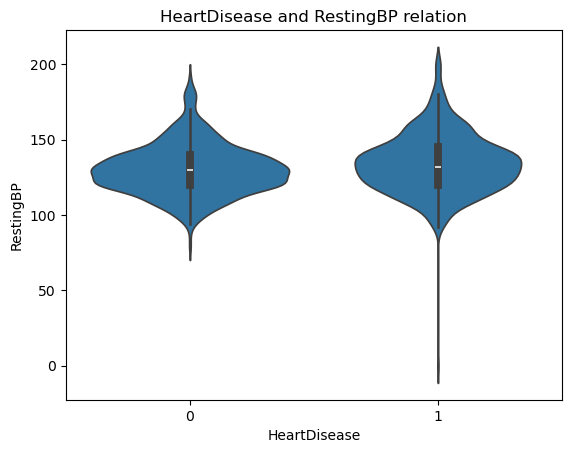

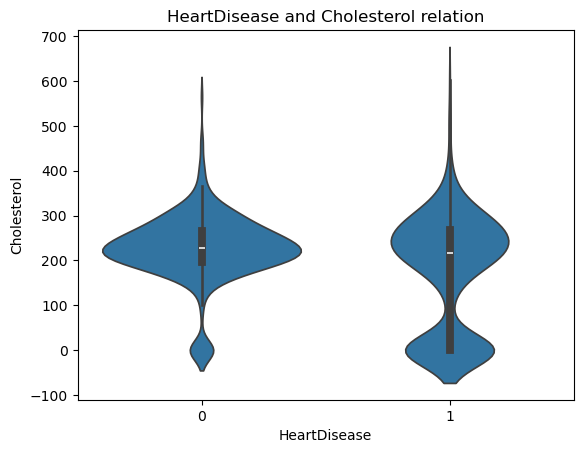

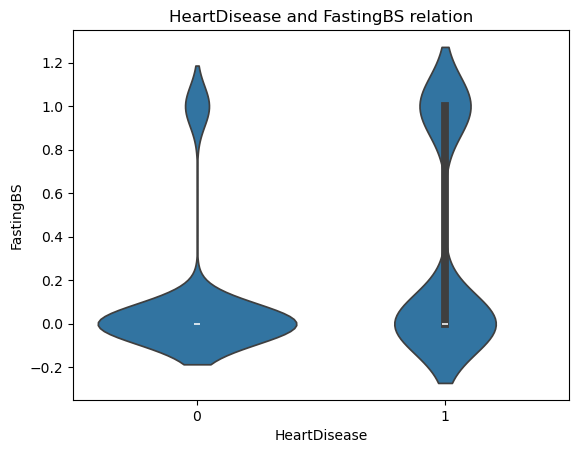

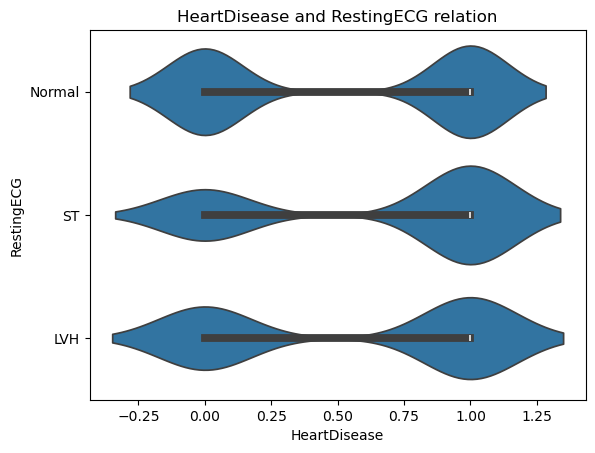

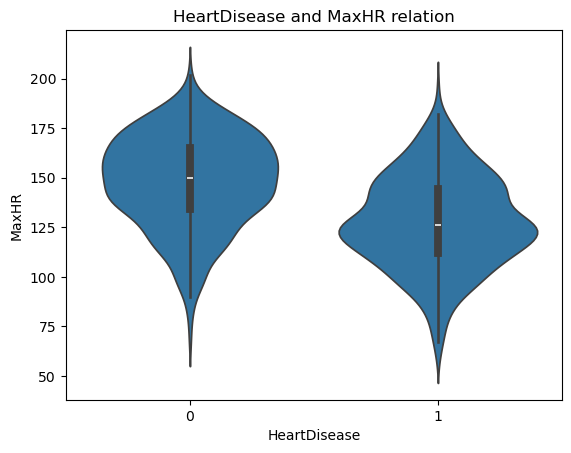

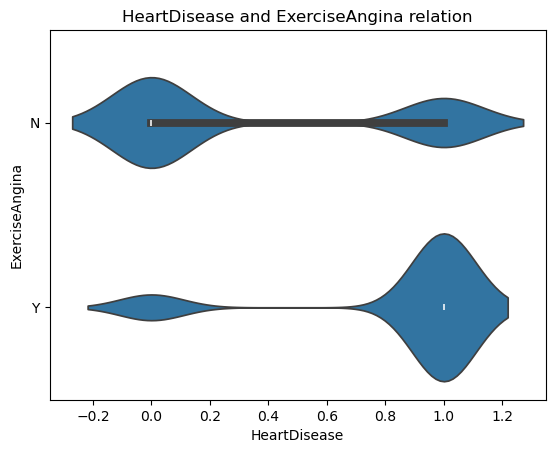

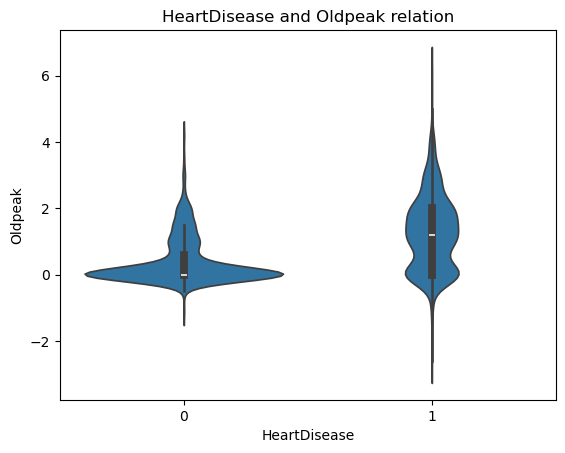

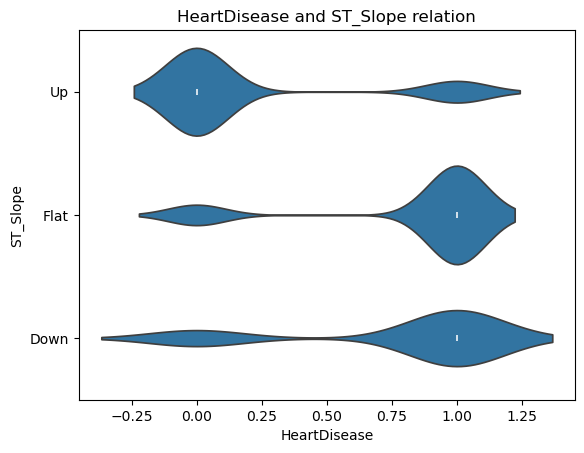

In [13]:
plt.figure(figsize = (6,6))
for col1 in df.columns:
    for col2 in df.columns:
        if col1 != col2 and df[col1].nunique() < 10:
            sns.violinplot(x = df[col1], y = df[col2])
            plt.title(f"{col1} and {col2} relation")
            plt.show()

### HeatMap

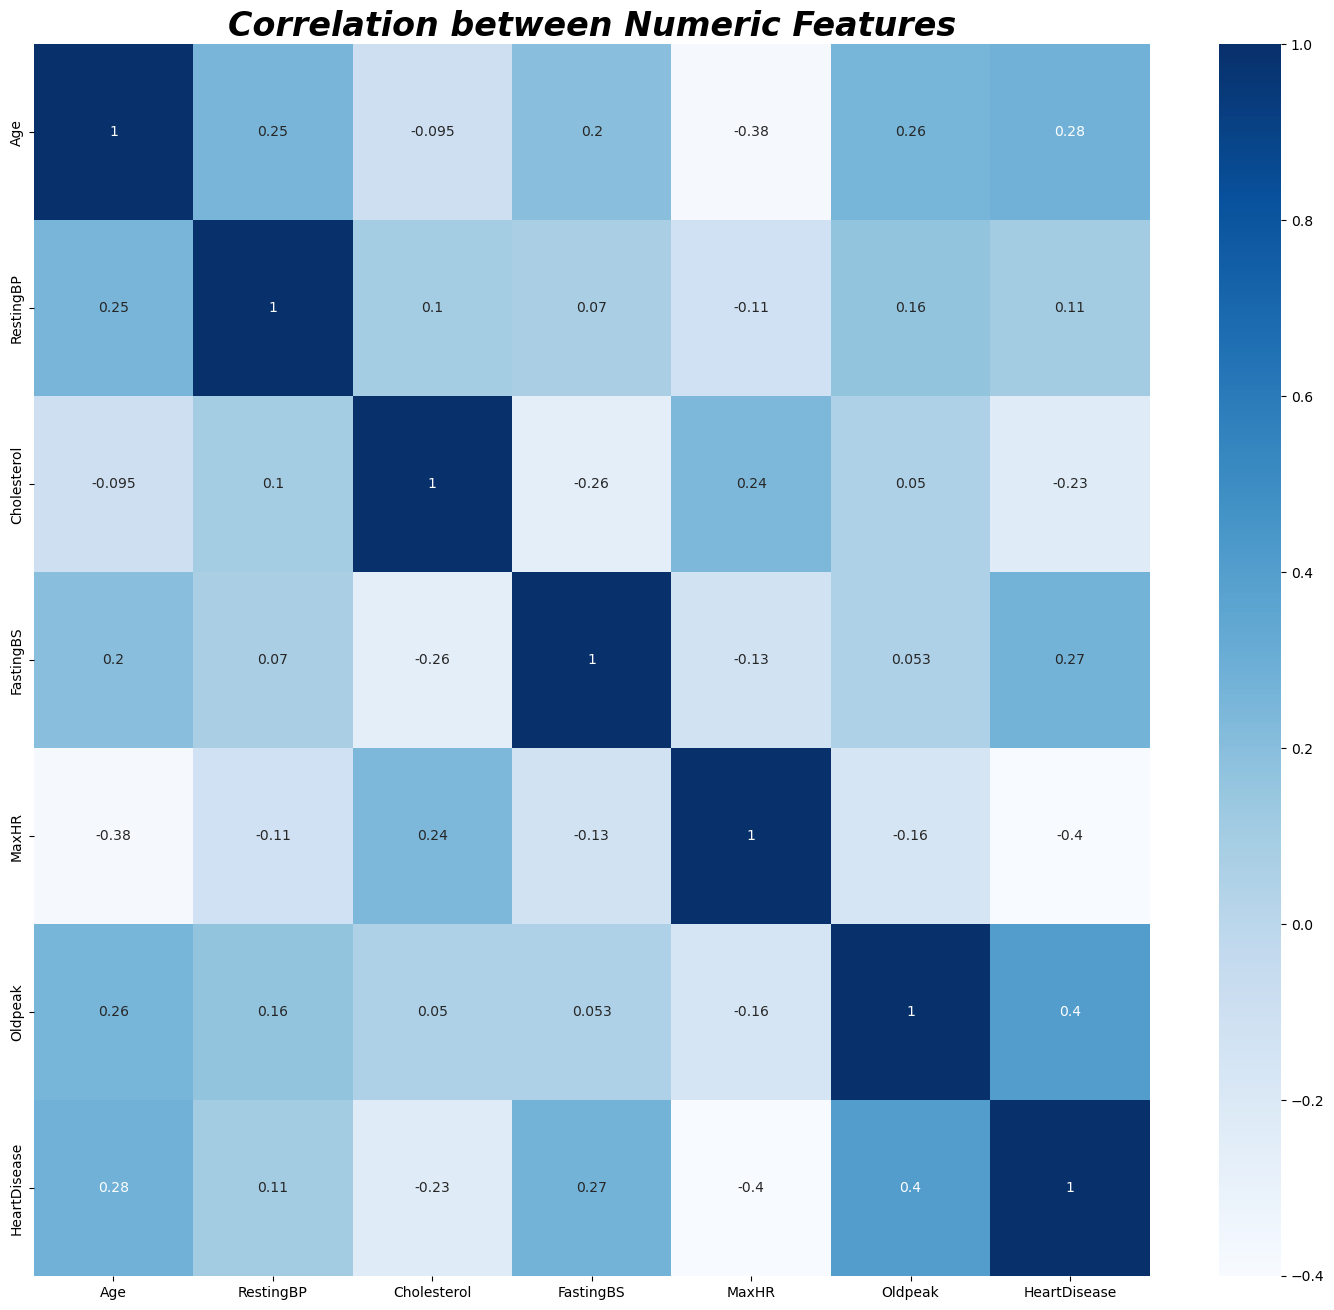

In [14]:
plt.figure(figsize = (18,16))
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = "Blues")
plt.title("Correlation between Numeric Features", {"fontsize": 24, "fontweight": "bold", "style": "italic"})
plt.show()

In [15]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [16]:
df1 = pd.get_dummies(df, columns=["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"], drop_first=True)

In [17]:
df1.head()

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172      0.0             0   
1   49        160          180          0    156      1.0             1   
2   37        130          283          0     98      0.0             0   
3   48        138          214          0    108      1.5             1   
4   54        150          195          0    122      0.0             0   

   Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0   True               True              False             False   
1  False              False               True             False   
2   True               True              False             False   
3  False              False              False             False   
4   True              False               True             False   

   RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0               True          False             False          False   
1               True          False             False           True   
2              False           True             False          False   
3               True          False              True           True   
4               True          False             False          False   

   ST_Slope_Up  
0         True  
1        False  
2         True  
3        False  
4         True

In [18]:
df1.corr()

Age  RestingBP  Cholesterol  FastingBS     MaxHR  \
Age                1.000000   0.254399    -0.095282   0.198039 -0.382045   
RestingBP          0.254399   1.000000     0.100893   0.070193 -0.112135   
Cholesterol       -0.095282   0.100893     1.000000  -0.260974  0.235792   
FastingBS          0.198039   0.070193    -0.260974   1.000000 -0.131438   
MaxHR             -0.382045  -0.112135     0.235792  -0.131438  1.000000   
Oldpeak            0.258612   0.164803     0.050148   0.052698 -0.160691   
HeartDisease       0.282039   0.107589    -0.232741   0.267291 -0.400421   
Sex_M              0.055750   0.005133    -0.200092   0.120076 -0.189186   
ChestPainType_ATA -0.218165  -0.046153     0.150954  -0.140514  0.253735   
ChestPainType_NAP -0.011335  -0.041348    -0.006634  -0.039249  0.134580   
ChestPainType_TA   0.032042   0.049855     0.017365   0.026885  0.100025   
RestingECG_Normal -0.230566  -0.116851    -0.038470  -0.093028  0.023801   
RestingECG_ST      0.136798   0.090447    -0.133106   0.127110 -0.157879   
ExerciseAngina_Y   0.215793   0.155101    -0.034166   0.060451 -0.370425   
ST_Slope_Flat      0.185568   0.099207    -0.050953   0.107006 -0.342581   
ST_Slope_Up       -0.258067  -0.096146     0.094027  -0.161730  0.383397   

                    Oldpeak  HeartDisease     Sex_M  ChestPainType_ATA  \
Age                0.258612      0.282039  0.055750          -0.218165   
RestingBP          0.164803      0.107589  0.005133          -0.046153   
Cholesterol        0.050148     -0.232741 -0.200092           0.150954   
FastingBS          0.052698      0.267291  0.120076          -0.140514   
MaxHR             -0.160691     -0.400421 -0.189186           0.253735   
Oldpeak            1.000000      0.403951  0.105734          -0.262124   
HeartDisease       0.403951      1.000000  0.305445          -0.401924   
Sex_M              0.105734      0.305445  1.000000          -0.161522   
ChestPainType_ATA -0.262124     -0.401924 -0.161522           1.000000   
ChestPainType_NAP -0.106212     -0.212964 -0.066486          -0.256767   
ChestPainType_TA   0.032231     -0.054790 -0.004031          -0.110679   
RestingECG_Normal -0.116719     -0.091580 -0.010634           0.107941   
RestingECG_ST      0.055958      0.102527  0.063715          -0.046111   
ExerciseAngina_Y   0.408752      0.494282  0.190664          -0.300365   
ST_Slope_Flat      0.283295      0.554134  0.116077          -0.304667   
ST_Slope_Up       -0.450577     -0.622164 -0.150942           0.357588   

                   ChestPainType_NAP  ChestPainType_TA  RestingECG_Normal  \
Age                        -0.011335          0.032042          -0.230566   
RestingBP                  -0.041348          0.049855          -0.116851   
Cholesterol                -0.006634          0.017365          -0.038470   
FastingBS                  -0.039249          0.026885          -0.093028   
MaxHR                       0.134580          0.100025           0.023801   
Oldpeak                    -0.106212          0.032231          -0.116719   
HeartDisease               -0.212964         -0.054790          -0.091580   
Sex_M                      -0.066486         -0.004031          -0.010634   
ChestPainType_ATA          -0.256767         -0.110679           0.107941   
ChestPainType_NAP           1.000000         -0.122381           0.005010   
ChestPainType_TA           -0.122381          1.000000          -0.057719   
RestingECG_Normal           0.005010         -0.057719           1.000000   
RestingECG_ST              -0.042236         -0.011611          -0.602314   
ExerciseAngina_Y           -0.166030         -0.128105          -0.072924   
ST_Slope_Flat              -0.072031         -0.010486          -0.047172   
ST_Slope_Up                 0.093583          0.002087           0.078563   

                   RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  ST_Slope_Up  
Age                     0.136798          0.215793       0.185568    -0.258067  


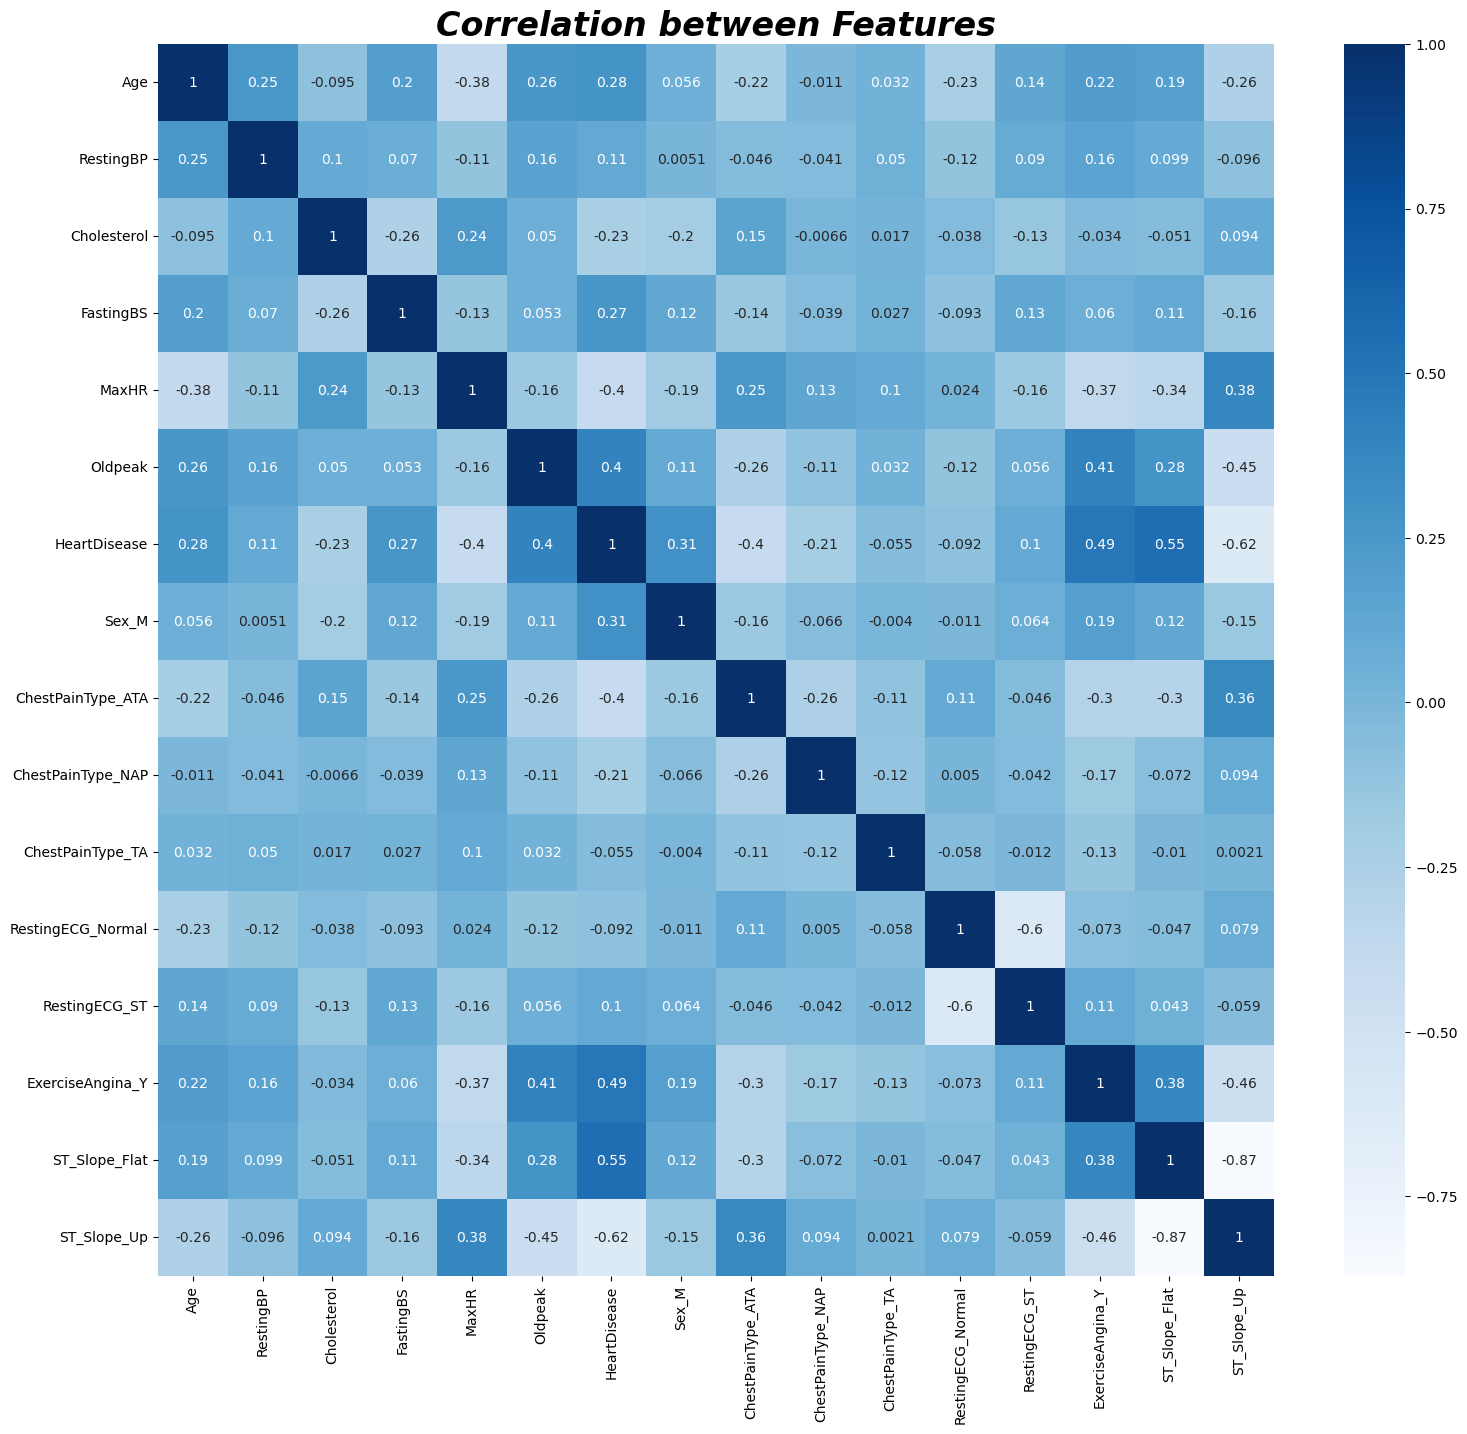

In [19]:
plt.figure(figsize = (18,16))
sns.heatmap(df1.corr(), annot = True, cmap = "Blues")
plt.title("Correlation between Features", {"fontsize": 24, "fontweight": "bold", "style": "italic"})
plt.show()

### Joint Plot

In [38]:
df2 = df.drop(["HeartDisease", "FastingBS"], axis = 1)

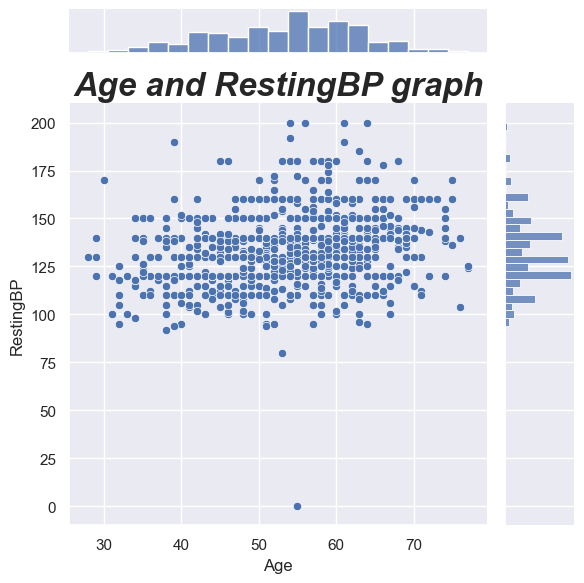

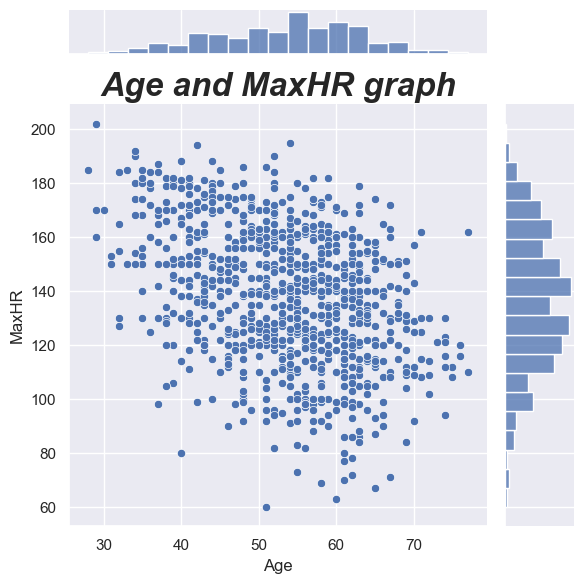

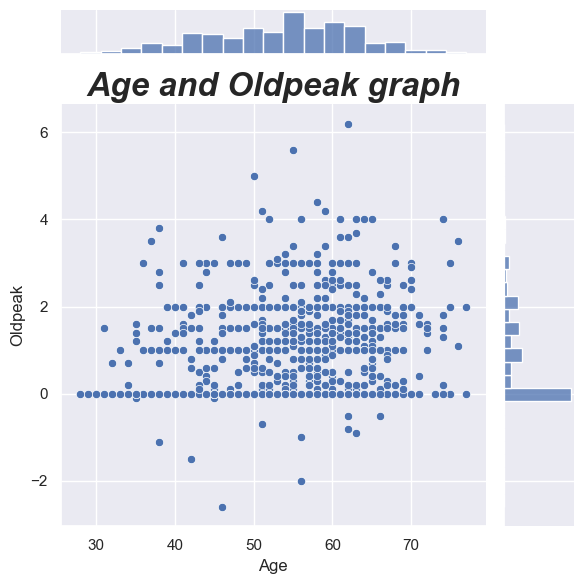

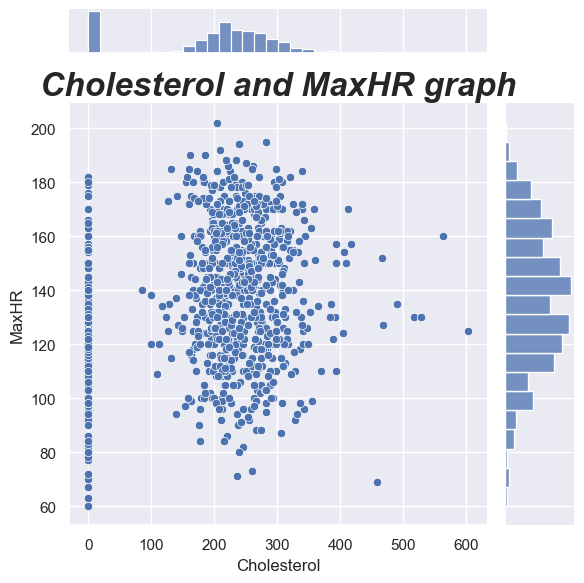

In [39]:
corr_matrix = df2.corr(numeric_only = True)

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        corr_value = corr_matrix.loc[col1, col2]
        if abs(corr_value) >= .19:
            sns.set(rc = {"figure.figsize": (5,5)})
            sns.jointplot(x = col1, y = col2, data = df)
            plt.title(f"{col1} and {col2} graph", 
                      {"fontsize": 24, "fontweight": "bold", "style": "italic"})
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.tight_layout()
            plt.show()

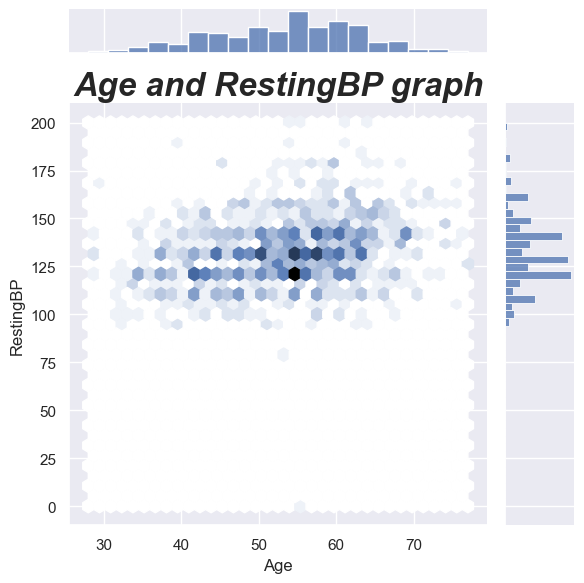

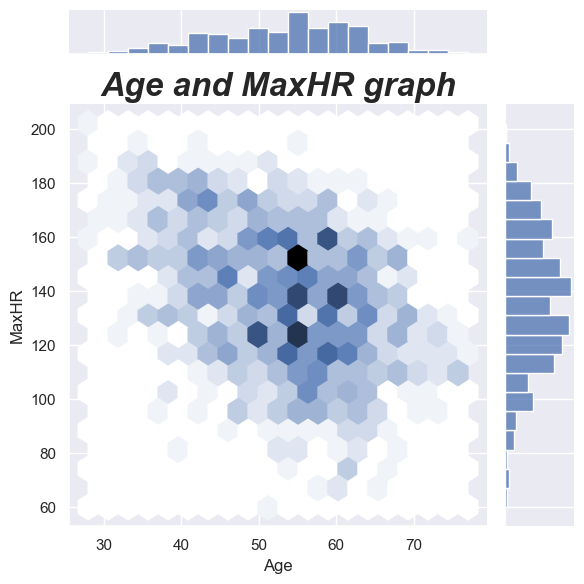

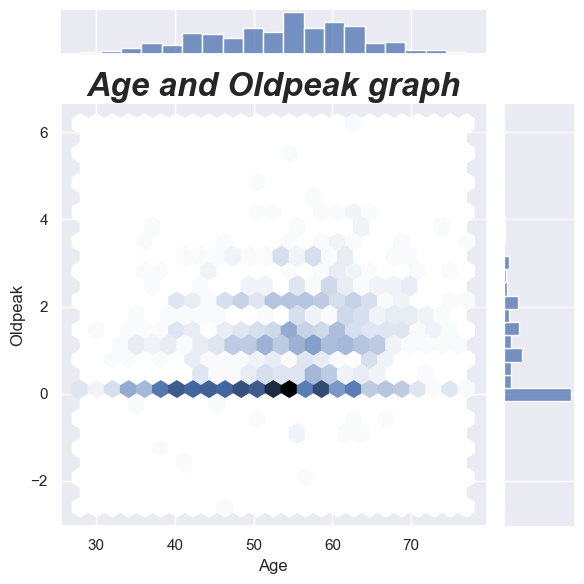

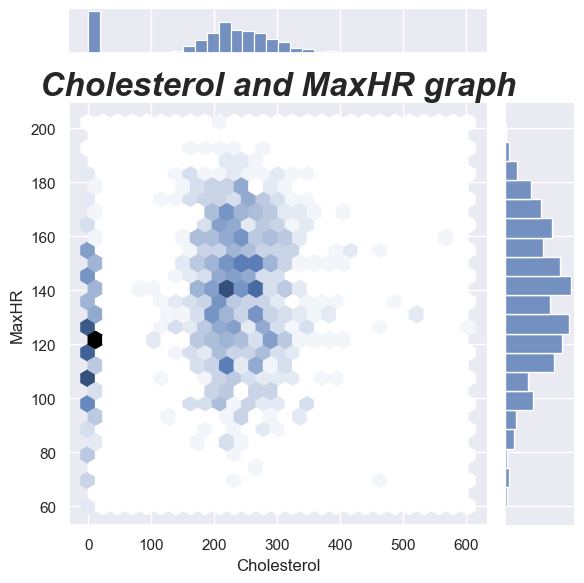

In [40]:
corr_matrix = df2.corr(numeric_only = True)

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        corr_value = corr_matrix.loc[col1, col2]
        if abs(corr_value) >= .19:
            sns.set(rc = {"figure.figsize": (5,5)})
            sns.jointplot(x = col1, y = col2, data = df, kind = "hex")
            plt.title(f"{col1} and {col2} graph", 
                      {"fontsize": 24, "fontweight": "bold", "style": "italic"})
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.tight_layout()
            plt.show()

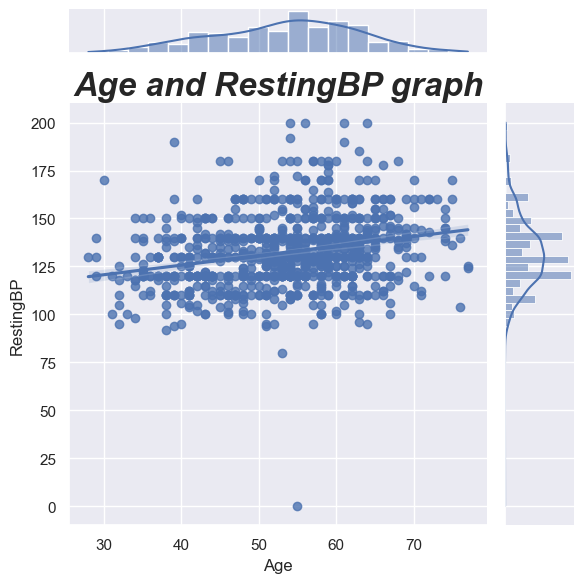

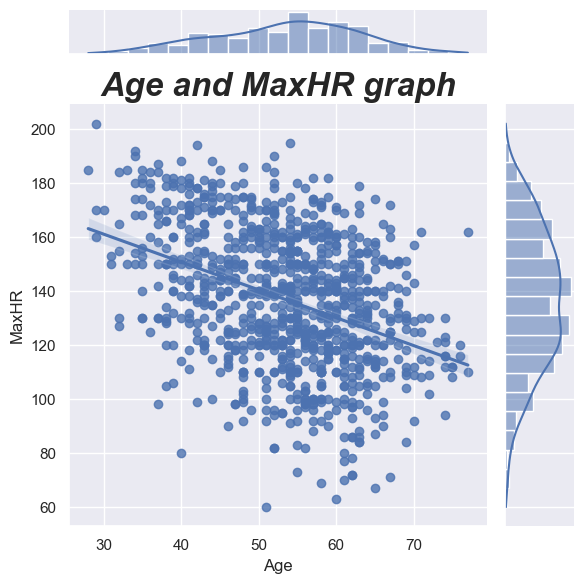

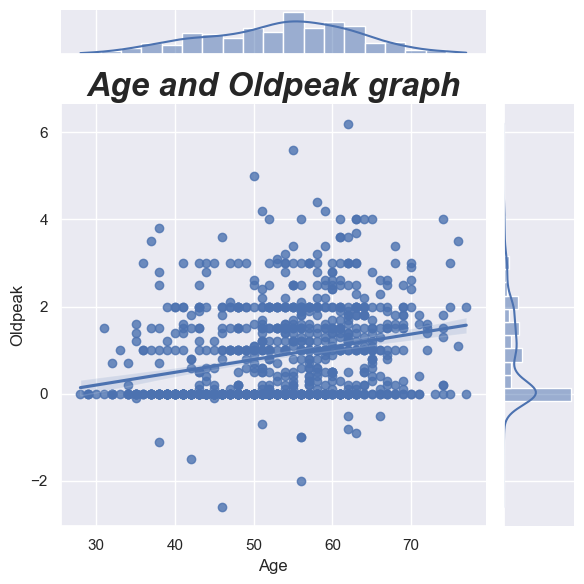

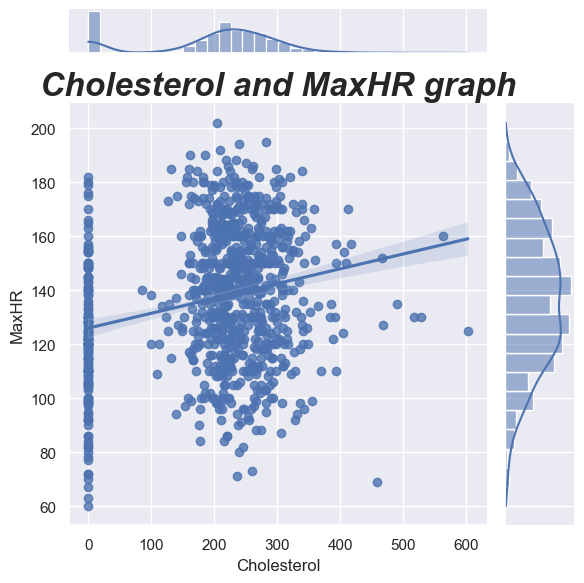

In [41]:
corr_matrix = df2.corr(numeric_only = True)

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        corr_value = corr_matrix.loc[col1, col2]
        if abs(corr_value) >= .19:
            sns.set(rc = {"figure.figsize": (5,5)})
            sns.jointplot(x = col1, y = col2, data = df, kind = "reg")
            plt.title(f"{col1} and {col2} graph", 
                      {"fontsize": 24, "fontweight": "bold", "style": "italic"})
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.tight_layout()
            plt.show()

### Pair Plot

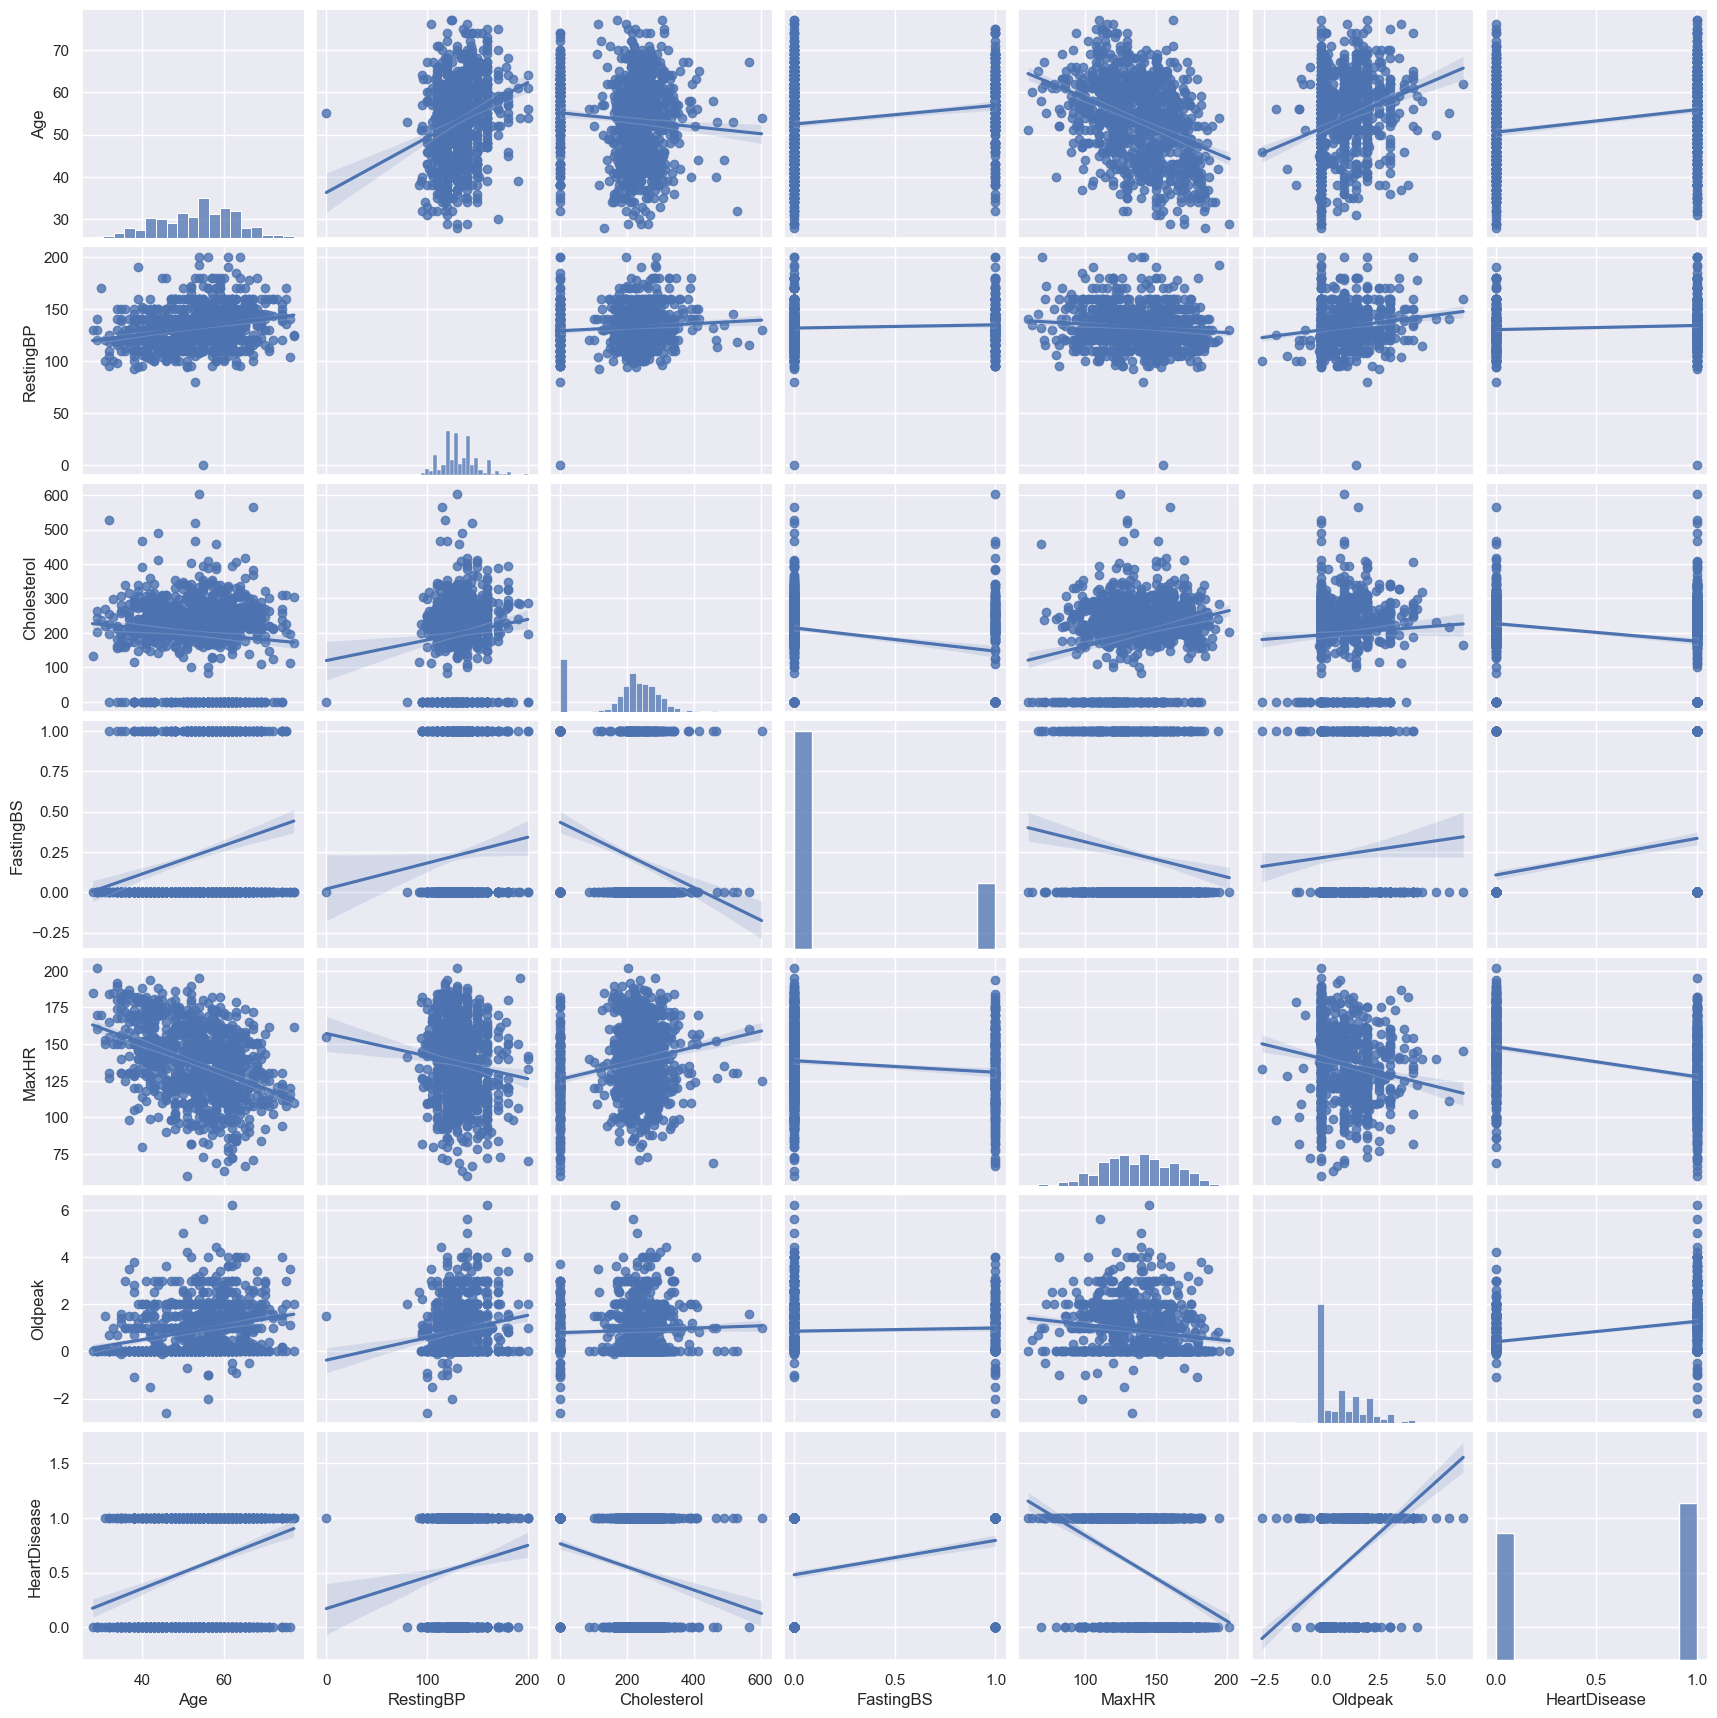

In [45]:
sns.pairplot(df, kind = "reg")
plt.show()

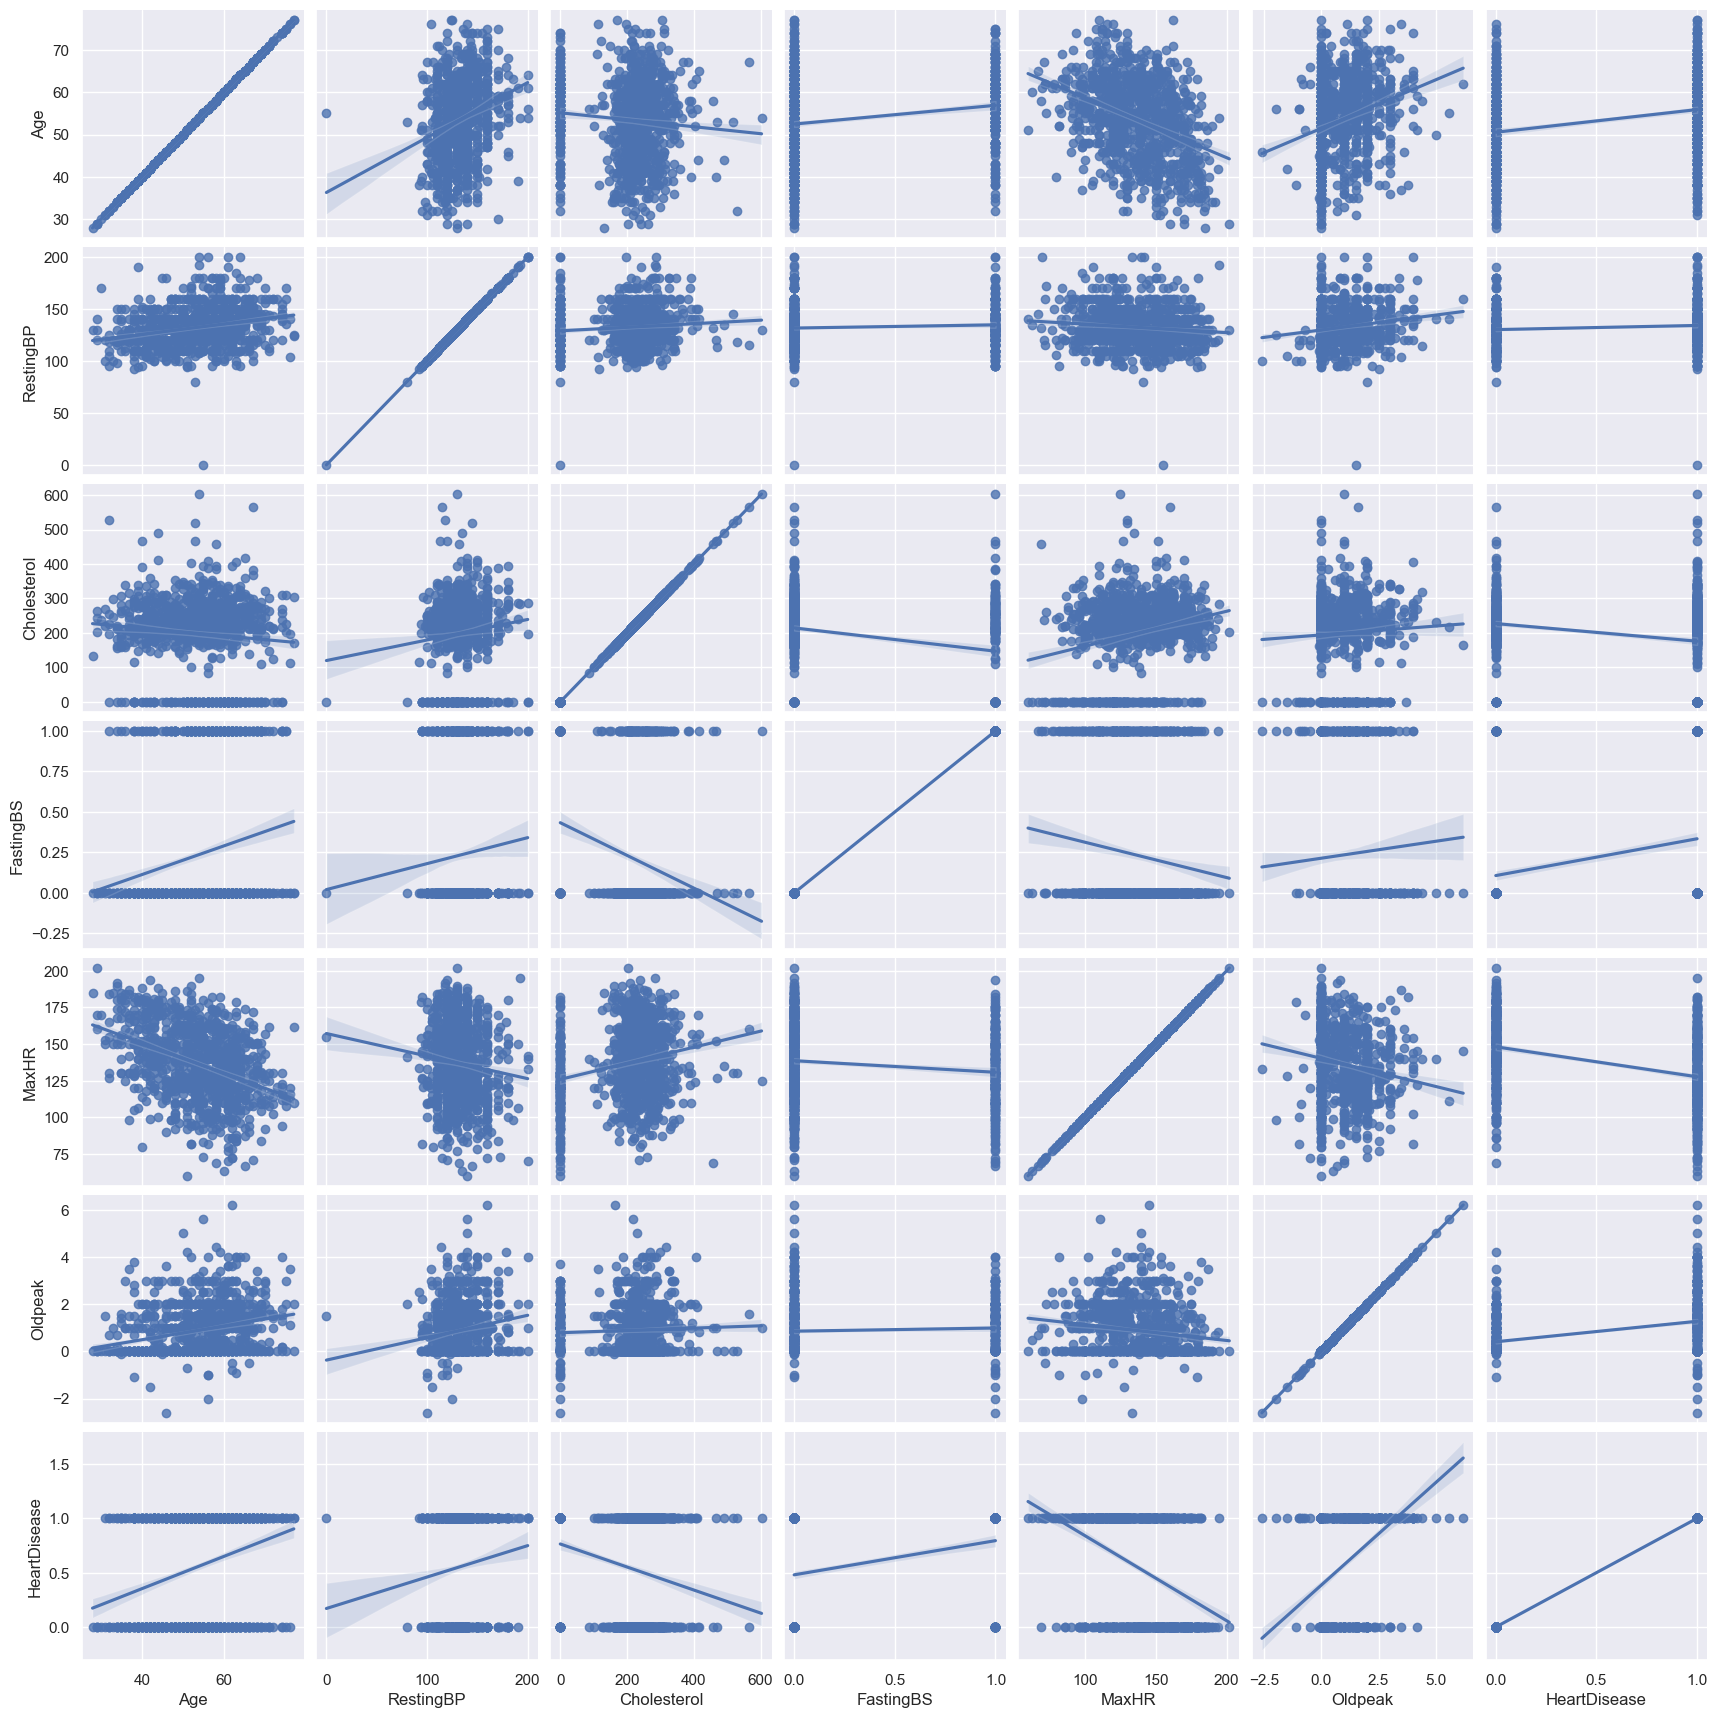

In [46]:
sns.pairplot(df, kind = "reg", diag_kind = None)
plt.show()